In [1]:
import numpy as np
from scipy.special import kn
from scipy.optimize import fsolve, root
import matplotlib.pyplot as plt

In [2]:
pdg2020=np.loadtxt("pdg2020",usecols=[1,2,3,4,5,6,7,8])
#Working units with the table is GeV thus we convert masses from MeV
pdg2020[:,0]=pdg2020[:,0]/1000

In [3]:
def phi(m,g,mu,T):
    return g*m**2/(2*np.pi**2)*T*np.exp(mu/T)*kn(2,m/T)

In [37]:
def ns(x,T):
    muB=x[0]
    muQ=x[1]
    muS=x[2]
    tnB1=0
    tnQ=0
    tnS=0
    tn=0
    for i,particle in enumerate(pdg2020):
        tmuB=particle[2]
        tmuQ=particle[1]
        tmuS=particle[3]
        tm=particle[0]
        tg=2*particle[4]+1
        tmu=(muB*tmuB+muQ*tmuQ+muS*tmuS)*.197
        tphi=phi(tm,tg,tmu,T*.197)
        tnB1+=tmuB*tphi
        tnQ+=tmuQ*tphi
        tnS+=tmuS*tphi
        tn+=tphi
    tnB1=tnB1/((0.197)**3)
    tnQ=tnQ/((0.197)**3)
    tnS=tnS/((0.197)**3)
    tn=tn/((0.197)**3)
    return np.array([tnB1,tnQ,tnS])

def nQs(muB,x,T):
    muQ=x[0]
    muS=x[1]
    tnB1=0
    tnQ=0
    tnS=0
    tn=0
    for i,particle in enumerate(pdg2020):
        tmuB=particle[2]
        tmuQ=particle[1]
        tmuS=particle[3]
        tm=particle[0]
        tg=2*particle[4]+1
        tmu=(muB*tmuB+muQ*tmuQ+muS*tmuS)*.197
        tphi=phi(tm,tg,tmu,T*.197)
        tnB1+=tmuB*tphi
        tnQ+=tmuQ*tphi
        tnS+=tmuS*tphi
        tn+=tphi
    tnB1=tnB1/((0.197)**3)
    tnQ=tnQ/((0.197)**3)
    tnS=tnS/((0.197)**3)
    tn=tn/((.197)**3)
    return tnB1,np.array([tnQ,tnS])

def nL(x,T):
    muB=x[0]
    muQ=x[1]
    muS=x[2]
    tnB1=0
    tnQ=0
    tnS=0
    tn=0
    for i,particle in enumerate(pdg2020):
        tmuB=particle[2]
        tmuQ=particle[1]
        tmuS=particle[3]
        tm=particle[0]
        tg=2*particle[4]+1
        tmu=(muB*tmuB+muQ*tmuQ+muS*tmuS)*.197
        tphi=phi(tm,tg,tmu,T*.197)
        tnB1+=tmuB*tphi
        tnQ+=tmuQ*tphi
        tnS+=tmuS*tphi
        tn+=tphi
    tnB1=tnB1/((0.197)**3)
    tnQ=tnQ/((0.197)**3)
    tnS=tnS/((0.197)**3)
    tn=tn/((.197)**3)
    return tn
def nLQ(x,T):
    muB=x[0]
    muQ=x[1]
    muS=x[2]
    tnB1=0
    tnQ=0
    tnS=0
    tn=0
    for i,particle in enumerate(pdg2020):
        tmuB=particle[2]
        tmuQ=particle[1]
        tmuS=particle[3]
        tm=particle[0]
        tg=2*particle[4]+1
        tmu=(muB*tmuB+muQ*tmuQ+muS*tmuS)*.197
        tphi=phi(tm,tg,tmu,T*.197)
        tnB1+=tmuB*tphi
        tnQ+=tmuQ*tphi
        tnS+=tmuS*tphi
        tn+=np.abs(tmuQ)*tphi
    tnB1=tnB1/((0.197)**3)
    tnQ=tnQ/((0.197)**3)
    tnS=tnS/((0.197)**3)
    tn=tn/((.197)**3)
    return tn

def es(x,T):
    te=0
    
    muB=x[0]
    muQ=x[1]
    muS=x[2]
    for i,particle in enumerate(pdg2020):
        tmuB=particle[2]
        tmuQ=particle[1]
        tmuS=particle[3]
        tm=particle[0]
        tT=T*.197
        tg=2*particle[4]+1
        tmu=(muB*tmuB+muQ*tmuQ+muS*tmuS)*.197
        tphi=phi(tm,tg,tmu,T*.197)
        tpe=3*tT+tm*kn(1,tm/tT)/kn(2,tm/tT)
        te+=tpe*tphi

    return te/(.197**4)


In [20]:
def mus(rhos,T):
    def to_solve1(xk):
        d=ns(xk,T)
        return d-rhos
    return root(to_solve1,[.1,.0,-.1]).x
    
def muQS(muB1,T):
    def to_solve2(xk):
        nB1,d=nQs(muB1,xk,T)
        return d-np.array([nB1*0.4,0.])
    return root(to_solve2,[.1,-.1],method="lm").x

In [21]:
#HRG EoS

def p(muB,T):
    muQ, muS = muQS(muB,T)
    tnL=nL([muB,muQ,muS],T)
    return T*tnL
def nB(muB,T):
    muQ, muS = muQS(muB,T)
    nB,nQ,nS=ns([muB,muQ,muS],T)
    return nB
def e(muB,T):
    muQ, muS = muQS(muB,T)
    return es([muB,muQ,muS],T)
def dT_p(muB,T):
    dT=1e-5
    return (p(muB,T+dT)-p(muB,T-dT))/(2*dT)
def dmu_e(muB,T):
    dmu=1e-5
    return (e(muB+dmu,T)-e(muB-dmu,T))/(2*dmu)
def dmu_n(muB,T):
    dmu=1e-5
    return (nB(muB+dmu,T)-nB(muB-dmu,T))/(2*dmu)
def dChi_uds(x,T):
    dmu=1e-5
    chis=np.zeros((3,3), dtype=np.float32)
    #for i in range(3):
    for j in range(3):
        tx1=x.copy()
        tx1[j]=tx1[j]+dmu
        tx2=x.copy()
        tx2[j]=tx2[j]-dmu
        tchi=T*(ns(tx1,T)-ns(tx2,T))/(2*dmu)
        chis[j]=T*tchi
    return chis
def etas(muB,T):
    return (e(muB,T)+p(muB,T)-muB*nB(muB,T))/(4*np.pi)*2/T
def dT_n(muB,T):
    dT=1e-5
    return (nB(muB,T+dT)-nB(muB,T-dT))/(2*dT)
def dT_e(muB,T):
    dT=1e-5
    return (e(muB,T+dT)-e(muB,T-dT))/(2*dT)
def cs2(muB,T):
    return dT_p(muB,T)/(dT_e(muB,T)-dmu_e(muB,T)*(dT_n(muB,T)/dmu_n(muB,T)))+nB(muB,T)/(dmu_e(muB,T)-dT_e(muB,T)*(dmu_n(muB,T)/dT_n(muB,T)))
def crho2(muB,T):
    return dT_p(muB,T)/(dT_n(muB,T)-dmu_n(muB,T)*(dT_e(muB,T)/dmu_e(muB,T)))+nB(muB,T)/(dmu_n(muB,T)-dT_n(muB,T)*(dmu_e(muB,T)/dT_e(muB,T)))
def db_p(x,T):
    dT=1e-5
    return (nL(x*(T+dT)/T,T+dT)-nL(x*(T-dT)/T,T-dT))/(2*dT)*T**2
def dbb_p(muB,T):
    muQ, muS = muQS(muB,T)
    x=np.array([muB,muQ,muS])
    dT=1e-5
    return T**2*(db_p(x*(T+dT)/T,T+dT)-db_p(x*(T-dT)/T,T-dT))/(2*dT)
def dbmu_p(muB,T):
    
    muQ, muS = muQS(muB,T)
    x=np.array([muB,muQ,muS])
    dmu=1e-5
    chis=np.zeros(3, dtype=np.float32)
    #for i in range(3):
    for j in range(3):
        tx1=x.copy()
        tx1[j]=tx1[j]+dmu
        tx2=x.copy()
        tx2[j]=tx2[j]-dmu
        tchi=T*(db_p(tx1,T)-db_p(tx2,T))/(2*dmu)
        chis[j]=T*tchi
    return chis

In [22]:

#Derivatives of densities

def trans_matrix(muB,T):
    muQ, muS = muQS(muB,T)
    dx=1e-5
    drhodmudT=np.zeros((4,4),dtype=np.float64)
    x=np.array([muB,muQ,muS])
    drhodmudT[:3,:3]=dChi_uds(x,T)
    drhodmudT[:3,3]=(ns(x,T+dx)-ns(x,T-dx))/(2*dx)
    for i in range(3):
        tdx=np.zeros(3,dtype=np.float64)
        tdx[i]=dx
        tx1=x+tdx
        tx2=x-tdx
        drhodmudT[3,i]=(es(tx1,T)-es(tx2,T))/(2*dx)
    
    drhodmudT[3,3]=(es(x,T+dx)-es(x,T-dx))/(2*dx)
        
    return drhodmudT

def sounds(muB,T):
    L=trans_matrix(muB,T)
    muQ, muS = muQS(muB,T)
    x=np.array([muB,muQ,muS])
    dx=1e-6
    dmuTdQE=np.zeros((4,4),dtype=np.float32)
    dmuTdQE[0]=np.linalg.solve(L,[1,0,0,0])
    dmuTdQE[1]=np.linalg.solve(L,[0,1,0,0])
    dmuTdQE[2]=np.linalg.solve(L,[0,0,1,0])
    dmuTdQE[3]=np.linalg.solve(L,[0,0,0,1])
    dpdmuT=np.zeros(4,dtype=np.float64)
    for i in range(3):
        tdx=np.zeros(3,dtype=np.float64)
        tdx[i]=dx
        tx1=x+tdx
        tx2=x-tdx
        dpdmuT[i]=(T*nL(tx1,T)-T*nL(tx2,T))/(2*dx)
    
    dpdmuT[3]=((T+dx)*nL(x,T+dx)-(T-dx)*nL(x,T-dx))/(2*dx)
    dpdQE=np.zeros(4,dtype=np.float32)
    
    for i in range(4):
        for j in range(4):
            dpdQE[i]+=dpdmuT[j]*dmuTdQE[i,j]
    return dpdQE

In [23]:
#times
dt=0.003125
t0=1
tfin=11

#Initial density
rho0=8*.16
#initial temperature
T0=210/197
#derived

#Initial chemical potential

from scipy.optimize import fsolve
mu0=mus([rho0,.4*rho0,0],T0)
print(mu0)
def smuB(i0,T):
    return mus([i0,.4*i0,0],T)[0]
#def smuB(i0,T):
#    return i0/(2*pol_p2(T)*T**3)
def dT_smuB(i0,T):
    dT=1e-5
    return (smuB(i0,T+dT)-smuB(i0,T-dT))/(2*dT)
muB0=smuB(rho0,T0)
e0=e(muB0,T0)
p0=p(muB0,T0)
s0=e0+p0-muB0*rho0
cs20=cs2(muB0,T0)
crho20=crho2(muB0,T0)
print("e0: {}".format(e0))

print("T0: {}".format(T0))

print("mu0: {}".format(mu0))

print("rho0: {}".format(rho0))

print("p0: {}".format(p0))

print("s0: {}".format(s0))

print("cs2: {}".format(cs20))
print("crho2: {}".format(crho20))
def rho(tau):
    return rho0 * t0/tau
def dtau_rho(tau):
    return -rho0*t0/tau**2

[ 1.62118102 -0.07992546  0.62555586]
e0: 24.425640271078247
T0: 1.0659898477157361
mu0: [ 1.62118102 -0.07992546  0.62555586]
rho0: 1.28
p0: 3.4033113073441092
s0: 25.753839866558177
cs2: 0.15486658894114594
crho2: -0.27324741261770513


In [24]:
#Bjorken background for the EoS above
def f_ode(xc,tau):
    y=mus(np.array([rho(tau),0.4*rho(tau),0]),xc)[0]
    A=-((e(y,xc)+p(y,xc)-4./(3*tau)*etas(y,xc))/tau+dmu_e(y,xc)/dmu_n(y,xc)*dtau_rho(tau))/(dT_e(y,xc)+dmu_e(y,xc)*dT_smuB(rho(tau),xc))
    return A

In [28]:
#Euler Predictor-Corrector is used to solve for B
ts=[1]
t=1
Ts=[209/197]
dt=.01
for i in np.arange(1,10000):
    t=t+dt
    ts+=[t]
    tTs=Ts[i-1]+dt*f_ode(Ts[i-1],ts[i])
    Ts+=[Ts[i-1]+dt/2*(f_ode(Ts[i-1],ts[i-1])+f_ode(tTs,ts[i]))]
    if Ts[i]<150/197:
        break

In [29]:
sol=np.array(Ts)
ts=np.array(ts)

In [30]:
ts

array([ 1.  ,  1.01,  1.02, ..., 11.02, 11.03, 11.04])

In [31]:

s_mu=np.zeros(ts.size,dtype=np.float32)
P=np.zeros(ts.size,dtype=np.float32)
E=np.zeros(ts.size,dtype=np.float32)
S=np.zeros(ts.size,dtype=np.float32)

cB2=np.zeros(ts.size,dtype=np.float32)

cQ2=np.zeros(ts.size,dtype=np.float32)

cS2=np.zeros(ts.size,dtype=np.float32)

cE2=np.zeros(ts.size,dtype=np.float32)

dTT_P=np.zeros(ts.size,dtype=np.float32)

dTmu_P=np.zeros((ts.size,3),dtype=np.float32)

for i,tT in enumerate(sol):
    s_mu[i]=smuB(rho(ts[i]),tT)
    P[i]=p(s_mu[i],tT)
    E[i]=e(s_mu[i],tT)
    S[i]=P[i]-s_mu[i]*rho(ts[i])+E[i]
    cB2[i],cQ2[i],cS2[i],cE2[i]=sounds(s_mu[i],tT)
    dTT_P[i]=dbb_p(s_mu[i],tT)
    dTmu_P[i]=dbmu_p(s_mu[i],tT).flatten()
print(s_mu)
name="8n0"
np.savetxt("T-n-{}.dat".format(name),sol)
np.savetxt("p-n-{}.dat".format(name),P)
np.savetxt("e-n-{}.dat".format(name),E)
np.savetxt("s-n-{}.dat".format(name),S)
np.savetxt("cB2-n-{}.dat".format(name),cB2)
np.savetxt("cQ2-n-{}.dat".format(name),cQ2)
np.savetxt("cS2-n-{}.dat".format(name),cS2)
np.savetxt("cE2-n-{}.dat".format(name),cE2)
np.savetxt("dbb_p-n-{}.dat".format(name),dTT_P)
np.savetxt("dbmu_p-n-{}.dat".format(name),dTmu_P)
np.savetxt("mu-n-{}.dat".format(name),s_mu)

[1.6546276 1.6517638 1.6489668 ... 1.6340798 1.6342481 1.6344163]


In [32]:
chis=np.zeros((ts.size,9),dtype=np.float32)
for i,tT in enumerate(sol):
    muB=s_mu[i]
    muQ,muS=muQS(muB,tT)
    x=np.array([muB,muQ,muS])
    chis[i]=(dChi_uds(x,tT).flatten())
np.savetxt("chis-n-{}.dat".format(name),chis)

In [24]:
from scipy.interpolate import CubicSpline
from scipy.interpolate import pade

rho0=8*.16
name="8n0"
tt1=1.
p0=np.loadtxt("p-n-{}.dat".format(name))
print(p0.size)
T0=np.loadtxt("T-n-{}.dat".format(name))
mu0=np.loadtxt("mu-n-{}.dat".format(name))
s0=np.loadtxt("s-n-{}.dat".format(name))
e0=np.loadtxt("e-n-{}.dat".format(name))
cE20=np.loadtxt("cE2-n-{}.dat".format(name))
cS20=np.loadtxt("cS2-n-{}.dat".format(name))
cB20=np.loadtxt("cB2-n-{}.dat".format(name))
cQ20=np.loadtxt("cQ2-n-{}.dat".format(name))
ts=np.linspace(1,11.04,1005)
#dbb_p=np.loadtxt("dbb_p-n-{}.dat".format(name))
#dbmu_p=np.loadtxt("dbmu_p-n-{}.dat".format(name))
pol_p0 = CubicSpline(ts, p0)
pol_e0 = CubicSpline(ts, e0)
pol_s0 = CubicSpline(ts, s0)
pol_T0 = CubicSpline(ts, T0)
pol_cE20 = CubicSpline(ts, cE20)
pol_cB20 = CubicSpline(ts, cB20)
pol_cQ20 = CubicSpline(ts, cQ20)
pol_cS20 = CubicSpline(ts, cS20)
#pol_k20 = CubicSpline(W[0,:], W[1,:])
#pol_ee = CubicSpline(dbb_p[0,:], dbb_p[1,:])
#pol_en = CubicSpline(dbmu_p[0,:], dbmu_p[1,:])
def T(t):
    return pol_T0(t)

def p(t):
    return pol_p0(t)
def e(t):
    return pol_e0(t)
def dpde(t):
    return pol_cE20(t)
def dpdrhoQ(t):
    return pol_cQ20(t)
def dpdrhoB(t):
    return pol_cB20(t)
def dpdrhoS(t):
    return pol_cS20(t)
def s(t):
    return pol_s0(t)
def etas(t):
    return (pol_s0(t))/(4*np.pi)*2/T(t)

def rho(t):
    return rho0*(tt1/t)

def Mz(t):
    return e(t)+p(t)-4./3.*etas(t)/t
def dMz(t):
    dt=1e-4
    return (Mz(t+dt)-Mz(t-dt))/(2*dt)

1005


In [25]:
def k2(t):
    return pol_k20(t)
def ee(t):
    return pol_ee(t)
def en(t):
    return pol_en(t)

In [26]:
def D(T):
    C=2.
    return C/(2*np.pi*T)

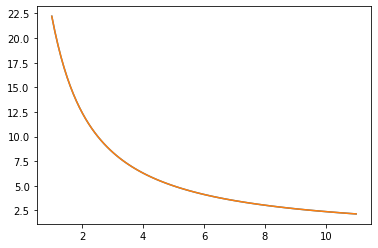

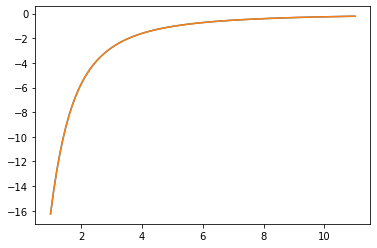

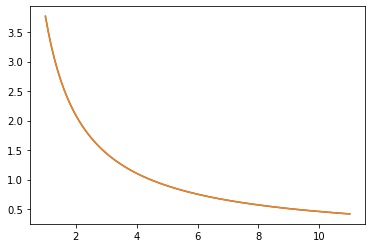

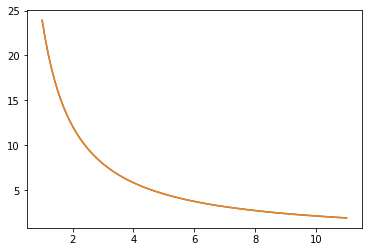

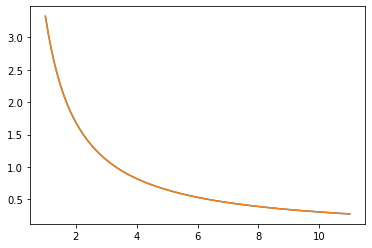

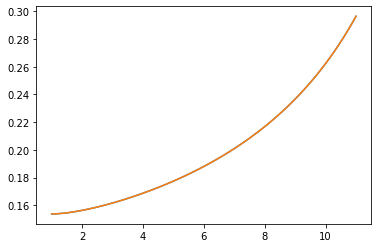

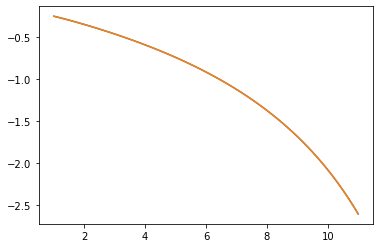

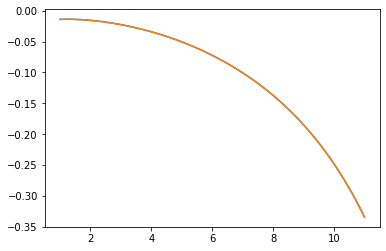

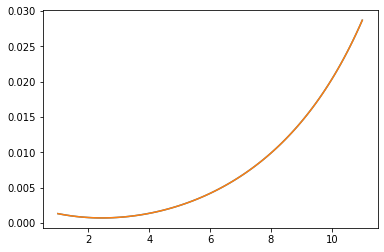

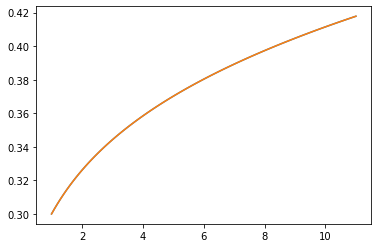

In [38]:

t1=np.linspace(1,11,100)
pt=np.polyfit(t1,Mz(t1),10)
plt.plot(t1,Mz(t1))
plt.plot(t1,np.poly1d(pt)(t1))
plt.show()
np.savetxt("{}-Mst.dat".format(name),pt)

t1=np.linspace(1,11,100)
pt=np.polyfit(t1,dMz(t1),10)
plt.plot(t1,dMz(t1))
plt.plot(t1,np.poly1d(pt)(t1))
plt.show()
np.savetxt("{}-dMst.dat".format(name),pt)

t1=np.linspace(1,11,100)
pt=np.polyfit(t1,etas(t1),10)
plt.plot(t1,etas(t1))
plt.plot(t1,np.poly1d(pt)(t1))
plt.show()
np.savetxt("{}-etas.dat".format(name),pt)

t1=np.linspace(1,11,100)
pt=np.polyfit(t1,e(t1),10)
plt.plot(t1,e(t1))
plt.plot(t1,np.poly1d(pt)(t1))
plt.show()
np.savetxt("{}-e.dat".format(name),pt)

t1=np.linspace(1,11,100)
pt=np.polyfit(t1,p(t1),10)
plt.plot(t1,p(t1))
plt.plot(t1,np.poly1d(pt)(t1))
plt.show()
np.savetxt("{}-p.dat".format(name),pt)

t1=np.linspace(1,11,100)
pt=np.polyfit(t1,dpde(t1),10)
plt.plot(t1,dpde(t1))
plt.plot(t1,np.poly1d(pt)(t1))
plt.show()
np.savetxt("{}-dpde.dat".format(name),pt)

t1=np.linspace(1,11,100)
pt=np.polyfit(t1,dpdrhoB(t1),10)
plt.plot(t1,dpdrhoB(t1))
plt.plot(t1,np.poly1d(pt)(t1))
plt.show()
np.savetxt("{}-dpdrhoB.dat".format(name),pt)
t1=np.linspace(1,11,100)
pt=np.polyfit(t1,dpdrhoS(t1),10)
plt.plot(t1,dpdrhoS(t1))
plt.plot(t1,np.poly1d(pt)(t1))
plt.show()
np.savetxt("{}-dpdrhoS.dat".format(name),pt)
t1=np.linspace(1,11,100)
pt=np.polyfit(t1,dpdrhoQ(t1),10)
plt.plot(t1,dpdrhoQ(t1))
plt.plot(t1,np.poly1d(pt)(t1))
plt.show()
np.savetxt("{}-dpdrhoQ.dat".format(name),pt)

t1=np.linspace(1,11,100)
pt=np.polyfit(t1,D(T(t1)),10)
plt.plot(t1,D(T(t1)))
plt.plot(t1,np.poly1d(pt)(t1))
plt.show()
np.savetxt("{}-D.dat".format(name),pt)



In [39]:
#At this point one has to run response functions

4.546524646298764
4.17106001213835e-10
0.0
6.80733867908332
0.0


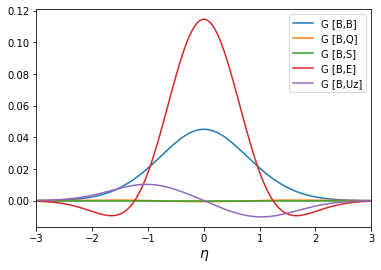

-1.0579203199665571e-08
4.546524202138634
0.0
6.807337829803055
0.0


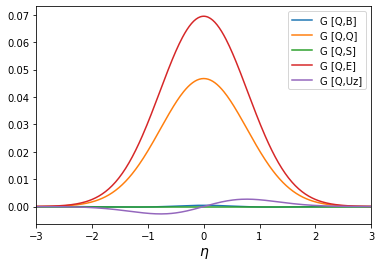

-2.1313620001935443e-09
2.366540998132967e-10
4.546524768620376
0.582671946969016
0.0


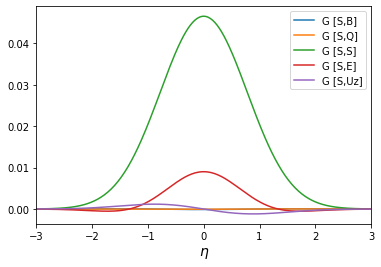

2.222625139925577e-08
-2.610534408434284e-09
0.0
2.9641316695853366
2.7755575615628914e-17


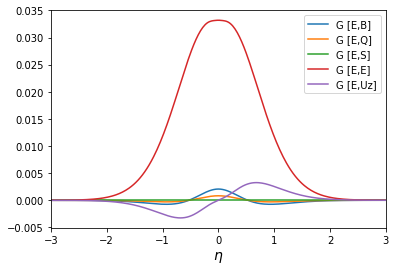

0.0
0.0
0.0
7.105427357601002e-15
4.27457118987416


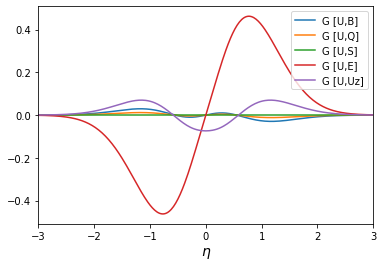

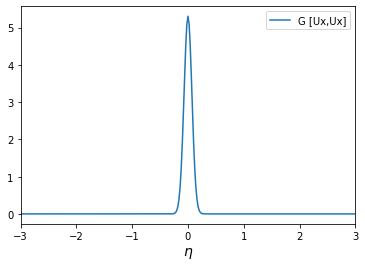

In [9]:
Neta=501
name="8n0"
for l1 in ['B','Q','S','E','U']:
    for l2 in ['B','Q','S','E','Uz']:
        df=np.loadtxt("Green-{}-{}.dat".format(l1,l2,0),max_rows=1)
        x=np.linspace(-5,5,Neta)
        plt.plot(x,df,label="G [{},{}]".format(l1,l2))
        print(np.sum(df))
    plt.xlabel(r"$\eta$",fontsize=14)
    plt.xlim(-3,3)
    #plt.ylim(-1.2,1.2)
    plt.legend(loc=1)
    plt.savefig(name+"-source-in-{}-response-in-{}.pdf".format(l1,l2),format="pdf")
    plt.show()
Neta=501
for l1 in ['Ux']:
    for l2 in ['Ux']:
        df=np.loadtxt("Green-{}-{}.dat".format(l1,l2,0),max_rows=1)
        x=np.linspace(-5,5,Neta)
        plt.plot(x,df,label="G [{},{}]".format(l1,l2))

    plt.xlabel(r"$\eta$",fontsize=14)
    plt.xlim(-3,3)
    #plt.ylim(-1.2,1.2)
    plt.legend(loc=1)
    plt.savefig(name+"-source-in-{}-response-in-{}.pdf".format(l1,l2),format="pdf")
    plt.show()


In [22]:
1/11

0.09090909090909091

In [ ]:
from scipy.interpolate import CubicSpline
from scipy.interpolate import pade

rho0=8*.16
name="8n0"
tt1=1.
p0=np.loadtxt("p-n-{}.dat".format(name))
print(p0.size)
T0=np.loadtxt("T-n-{}.dat".format(name))
mu0=np.loadtxt("mu-n-{}.dat".format(name))
s0=np.loadtxt("s-n-{}.dat".format(name))
e0=np.loadtxt("e-n-{}.dat".format(name))
cE20=np.loadtxt("cE2-n-{}.dat".format(name))
cS20=np.loadtxt("cS2-n-{}.dat".format(name))
cB20=np.loadtxt("cB2-n-{}.dat".format(name))
cQ20=np.loadtxt("cQ2-n-{}.dat".format(name))
chis0=np.loadtxt("chis-n-{}.dat".format(name))
ts=np.linspace(1,11,1002)
dbb_p=np.loadtxt("dbb_p-n-{}.dat".format(name))
dbmu_p=np.loadtxt("dbmu_p-n-{}.dat".format(name))
pol_p0 = CubicSpline(ts, p0)
pol_e0 = CubicSpline(ts, e0)
pol_s0 = CubicSpline(ts, s0)
pol_T0 = CubicSpline(ts, T0)
pol_cE20 = CubicSpline(ts, cE20)
pol_cB20 = CubicSpline(ts, cB20)
pol_cQ20 = CubicSpline(ts, cQ20)
pol_cS20 = CubicSpline(ts, cS20)
pol_ee = CubicSpline(ts, dbb_p)
pol_ens = []
for i in range(3):
    pol_ens+=[CubicSpline(ts, dbmu_p[:,i])]
pol_chis=[]
for i in range(3):
    for j in range(3):
        pol_chis+=[CubicSpline(ts, chis0[:,3*i+j])]
def T(t):
    return pol_T0(t)

def p(t):
    return pol_p0(t)
def e(t):
    return pol_e0(t)
def dpde(t):
    return pol_cE20(t)
def dpdrhoQ(t):
    return pol_cQ20(t)
def dpdrhoB(t):
    return pol_cB20(t)
def dpdrhoS(t):
    return pol_cS20(t)
def s(t):
    return pol_s0(t)
def etas(t):
    return (pol_s0(t))/(4*np.pi)*2/T(t)

def rho(t):
    return rho0*(tt1/t)

def Mz(t):
    return e(t)+p(t)-4./3.*etas(t)/t
def dMz(t):
    dt=1e-4
    return (Mz(t+dt)-Mz(t-dt))/(2*dt)
def jPP(t):
    return T(t)*(e(t)+p(t))
def Z0(x):
    return 0

In [12]:
Chi_matrix=[[pol_chis[0],pol_chis[1],pol_chis[2],pol_ens[0],Z0,Z0,Z0],
            [pol_chis[1],pol_chis[4],pol_chis[5],pol_ens[1],Z0,Z0,Z0],
            [pol_chis[2],pol_chis[5],pol_chis[8],pol_ens[2],Z0,Z0,Z0],
            [pol_ens[0],pol_ens[1],pol_ens[2],pol_ee,Z0,Z0,Z0],
            [Z0,Z0,Z0,Z0,jPP,Z0,Z0],
            [Z0,Z0,Z0,Z0,Z0,jPP,Z0],
            [Z0,Z0,Z0,Z0,Z0,Z0,jPP],]

In [13]:
def gaussian_correlation(chi,x,sigma2):
    return chi/(np.sqrt(2*np.pi*sigma2))*(np.exp(-x**2/(2*sigma2)))
gaussian_correlation(1,0,1)

0.3989422804014327

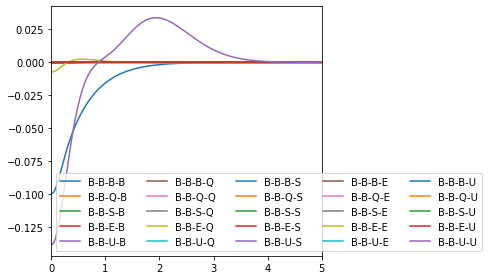

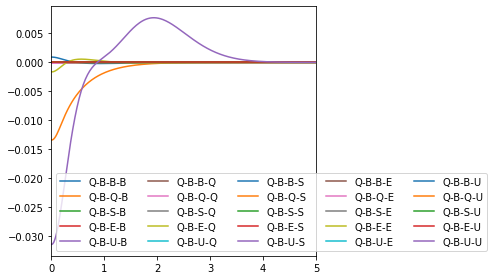

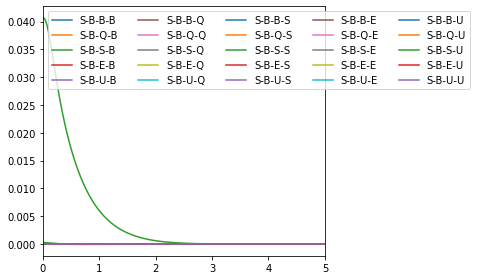

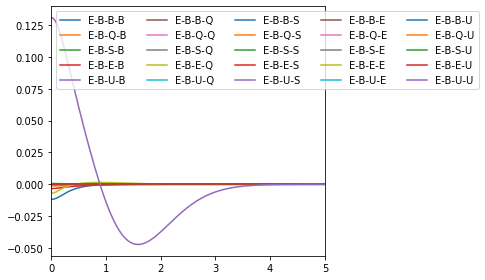

KeyboardInterrupt: 

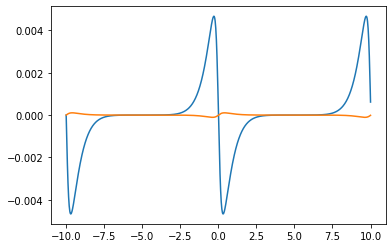

In [14]:
times=np.linspace(1,11,499)
for i1,l1 in enumerate(['B','Q','S','E','Uz']):
    for i2,k1 in enumerate(['B','Q','S','E','Uz']):
        for j1,l2 in enumerate(['B','Q','S','E','U']):
            for j2,k2 in enumerate(['B','Q','S','E','U']):
                dfl=np.loadtxt("Green-"+l2+"-"+l1+".dat")/50
                dfk=np.loadtxt("Green-"+k2+"-"+k1+".dat")/50
                dt=1e-5
                Gs=np.zeros(2*Neta,dtype=np.float32)
                j=lambda x:(Chi_matrix[j1][j2](x+dt)-Chi_matrix[j1][j2](x-dt))/(2*dt)+1./x*Chi_matrix[j1][j2](x)
                jl=lambda x:Chi_matrix[i1][i1](x)
                jk=lambda x:Chi_matrix[i2][i2](x)
                for m in np.arange(499): 
                    for n in np.arange(0,2*Neta):
                        Gs[n]+=times[m]*j(times[m])*np.sum(dfl[m]*np.roll(dfk[m],shift=n))*10/499
                x123=np.linspace(-10,10,2*Neta)
                plt.plot(x123,Gs*50/np.sqrt(jl(times[-1])*jk(times[-1])),label="{}-{}-{}-{}".format(k1,l1,k2,l2))
                np.savetxt("{}-{}-{}-{}.dat".format(k1,l1,k2,l2),Gs*50/np.sqrt(jl(ts[-1])*jk(ts[-1])))
        plt.legend(ncol=5)
        plt.xlim(0,5)
        plt.tight_layout()
        plt.savefig("Correlations-{}-{}.pdf".format(l1,k1),format='pdf')
        plt.show()
                

0
0
B-B: -0.009077073074877262 and -0.009054432791902293
B-B: 0.016444914042949677 and 0.016437173874910213
0
1
Q-B: -3.979039320256561e-13 and -0.002013327988578813
Q-B: 0.016444914042949677 and 0.0040388814181335705
0
2
S-B: -1.0800249583553523e-12 and 0.005026177269787647
S-B: 0.016444914042949677 and -0.008384684885828948
0
3
E-B: -8.640199666842818e-12 and -0.005539555669924639
E-B: 0.016444914042949677 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 0.016444914042949677 and 0.0
1
0
B-Q: -3.979039320256561e-13 and -0.002013327988578813
B-Q: 0.016444914042949677 and 0.0040388814181335705
1
1
Q-Q: 1.9539925233402755e-14 and -0.0035700967774267593
Q-Q: 0.016444914042949677 and 0.0264456784429629
1
2
S-Q: 2.4424906541753444e-15 and -0.0010285177534370906
S-Q: 0.016444914042949677 and 0.0064872902286939385
1
3
E-Q: 4.618527782440651e-14 and -0.0021987586350709068
E-Q: 0.016444914042949677 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.016444914042949677 and 0.0
2
0
B-S: -1.080

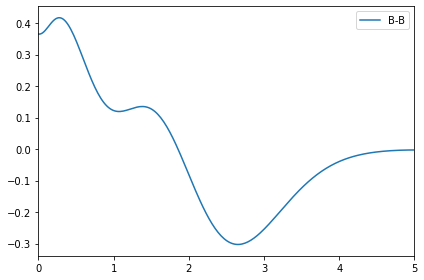

0
0
B-B: 1.0913936421275139e-11 and -0.009054432791902293
B-B: 4.547473508864641e-13 and 0.016437173874910213
0
1
Q-B: -0.002018362982198596 and -0.002013327988578813
Q-B: 0.004040783271193504 and 0.0040388814181335705
0
2
S-B: -3.410605131648481e-13 and 0.005026177269787647
S-B: 0.004040782805532217 and -0.008384684885828948
0
3
E-B: -1.0231815394945443e-12 and -0.005539555669924639
E-B: 0.004040782805532217 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 0.004040782805532217 and 0.0
1
0
B-Q: 1.7763568394002505e-15 and -0.002013327988578813
B-Q: 0.004040782805532217 and 0.0040388814181335705
1
1
Q-Q: -1.8758328224066645e-12 and -0.0035700967774267593
Q-Q: 0.00404078233987093 and 0.0264456784429629
1
2
S-Q: -1.1657341758564144e-15 and -0.0010285177534370906
S-Q: 0.004040783271193504 and 0.0064872902286939385
1
3
E-Q: -2.220446049250313e-14 and -0.0021987586350709068
E-Q: 0.004040782805532217 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.004040782805532217 and 0.0
2
0
B-S: -2.

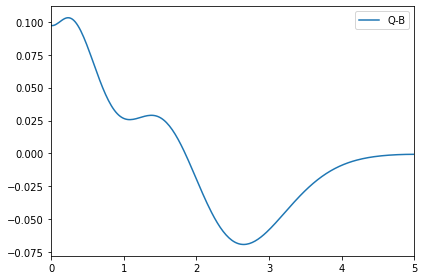

0
0
B-B: 0.0 and -0.009054432791902293
B-B: 0.0 and 0.016437173874910213
0
1
Q-B: 0.0 and -0.002013327988578813
Q-B: 0.0 and 0.0040388814181335705
0
2
S-B: 0.005038743373006582 and 0.005026177269787647
S-B: -0.008388632908463478 and -0.008384684885828948
0
3
E-B: 0.0 and -0.005539555669924639
E-B: -0.008388632908463478 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: -0.008388632908463478 and 0.0
1
0
B-Q: 0.0 and -0.002013327988578813
B-Q: -0.008388632908463478 and 0.0040388814181335705
1
1
Q-Q: 0.0 and -0.0035700967774267593
Q-Q: -0.008388632908463478 and 0.0264456784429629
1
2
S-Q: 1.9895196601282805e-13 and -0.0010285177534370906
S-Q: -0.008388632908463478 and 0.0064872902286939385
1
3
E-Q: 0.0 and -0.0021987586350709068
E-Q: -0.008388632908463478 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: -0.008388632908463478 and 0.0
2
0
B-S: 0.0 and 0.005026177269787647
B-S: -0.008388632908463478 and -0.008384684885828948
2
1
Q-S: 0.0 and -0.0010285177534370906
Q-S: -0.00838863290846347

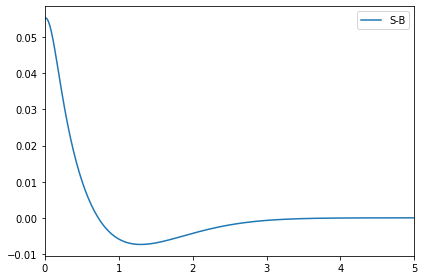

0
0
B-B: -0.009480057284235954 and -0.009054432791902293
B-B: 0.024622345343232155 and 0.016437173874910213
0
1
Q-B: -0.002078605815768242 and -0.002013327988578813
Q-B: 0.030672458931803703 and 0.0040388814181335705
0
2
S-B: 0.0005081762792542577 and 0.005026177269787647
S-B: 0.029597386717796326 and -0.008384684885828948
0
3
E-B: -0.004381833132356405 and -0.005539555669924639
E-B: 0.03913314640522003 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 0.03913314640522003 and 0.0
1
0
B-Q: 1.4779288903810084e-12 and -0.002013327988578813
B-Q: 0.03913314640522003 and 0.0040388814181335705
1
1
Q-Q: -2.2168933355715126e-12 and -0.0035700967774267593
Q-Q: 0.03913314267992973 and 0.0264456784429629
1
2
S-Q: 0.0 and -0.0010285177534370906
S-Q: 0.03913314267992973 and 0.0064872902286939385
1
3
E-Q: -1.1368683772161603e-13 and -0.0021987586350709068
E-Q: 0.03913314640522003 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.03913314640522003 and 0.0
2
0
B-S: 0.0 and 0.005026177269787647
B-S:

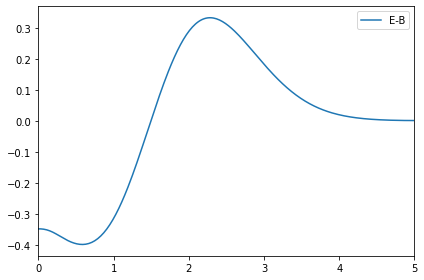

0
0
B-B: -2.3283064365386963e-10 and -0.009054432791902293
B-B: -1.1641532182693481e-10 and 0.016437173874910213
0
1
Q-B: 0.0 and -0.002013327988578813
Q-B: 1.1641532182693481e-10 and 0.0040388814181335705
0
2
S-B: 3.637978807091713e-12 and 0.005026177269787647
S-B: -5.820766091346741e-11 and -0.008384684885828948
0
3
E-B: 0.0 and -0.005539555669924639
E-B: -5.820766091346741e-11 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: -5.820766091346741e-11 and 0.0
1
0
B-Q: 0.0 and -0.002013327988578813
B-Q: -5.820766091346741e-11 and 0.0040388814181335705
1
1
Q-Q: -5.684341886080802e-14 and -0.0035700967774267593
Q-Q: 0.0 and 0.0264456784429629
1
2
S-Q: 0.0 and -0.0010285177534370906
S-Q: 1.7462298274040222e-10 and 0.0064872902286939385
1
3
E-Q: 2.842170943040401e-14 and -0.0021987586350709068
E-Q: -1.1641532182693481e-10 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: -1.1641532182693481e-10 and 0.0
2
0
B-S: -1.1368683772161603e-13 and 0.005026177269787647
B-S: -5.820766091346741e-11 a

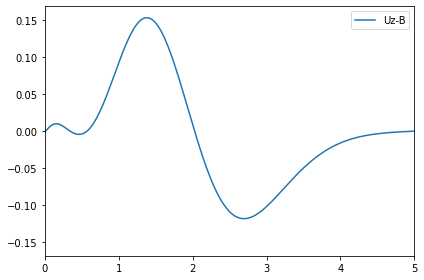

0
0
B-B: 1.0913936421275139e-11 and -0.009054432791902293
B-B: 4.547473508864641e-13 and 0.016437173874910213
0
1
Q-B: 1.7763568394002505e-15 and -0.002013327988578813
Q-B: 4.092726157978177e-12 and 0.0040388814181335705
0
2
S-B: -2.4868995751603507e-14 and 0.005026177269787647
S-B: 5.4569682106375694e-12 and -0.008384684885828948
0
3
E-B: -3.126388037344441e-13 and -0.005539555669924639
E-B: 1.8189894035458565e-12 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 1.8189894035458565e-12 and 0.0
1
0
B-Q: -0.002018362982198596 and -0.002013327988578813
B-Q: 0.004040783271193504 and 0.0040388814181335705
1
1
Q-Q: -1.8758328224066645e-12 and -0.0035700967774267593
Q-Q: 0.004040783271193504 and 0.0264456784429629
1
2
S-Q: 5.400124791776761e-13 and -0.0010285177534370906
S-Q: 0.004040783271193504 and 0.0064872902286939385
1
3
E-Q: -2.0463630789890885e-12 and -0.0021987586350709068
E-Q: 0.004040783271193504 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.004040783271193504 and 0.0
2
0
B

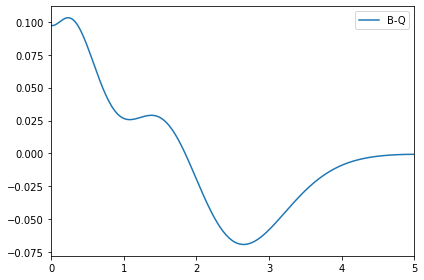

0
0
B-B: 4.831690603168681e-13 and -0.009054432791902293
B-B: -6.039613253960852e-14 and 0.016437173874910213
0
1
Q-B: -3.410605131648481e-13 and -0.002013327988578813
Q-B: 1.1368683772161603e-12 and 0.0040388814181335705
0
2
S-B: 8.881784197001252e-15 and 0.005026177269787647
S-B: -2.8421709430404007e-13 and -0.008384684885828948
0
3
E-B: -1.0658141036401503e-14 and -0.005539555669924639
E-B: 2.2737367544323206e-13 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 2.2737367544323206e-13 and 0.0
1
0
B-Q: -3.410605131648481e-13 and -0.002013327988578813
B-Q: 1.1368683772161603e-13 and 0.0040388814181335705
1
1
Q-Q: -0.003579031443223357 and -0.0035700967774267593
Q-Q: 0.026458125561475754 and 0.0264456784429629
1
2
S-Q: 1.4210854715202004e-13 and -0.0010285177534370906
S-Q: 0.026458125561475754 and 0.0064872902286939385
1
3
E-Q: -1.3642420526593924e-12 and -0.0021987586350709068
E-Q: 0.026458127424120903 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.026458127424120903 and 0.0
2


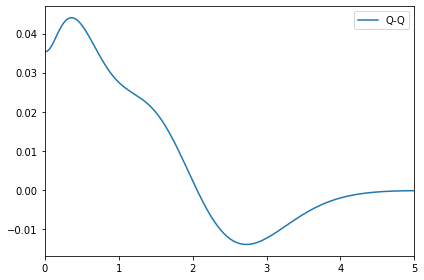

0
0
B-B: 0.0 and -0.009054432791902293
B-B: 0.0 and 0.016437173874910213
0
1
Q-B: 0.0 and -0.002013327988578813
Q-B: 0.0 and 0.0040388814181335705
0
2
S-B: -1.3642420526593924e-12 and 0.005026177269787647
S-B: -1.4779288903810084e-12 and -0.008384684885828948
0
3
E-B: 0.0 and -0.005539555669924639
E-B: -1.4779288903810084e-12 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: -1.4779288903810084e-12 and 0.0
1
0
B-Q: 0.0 and -0.002013327988578813
B-Q: -1.4779288903810084e-12 and 0.0040388814181335705
1
1
Q-Q: 0.0 and -0.0035700967774267593
Q-Q: -1.4779288903810084e-12 and 0.0264456784429629
1
2
S-Q: -0.0010310941142961383 and -0.0010285177534370906
S-Q: 0.006490344647318125 and 0.0064872902286939385
1
3
E-Q: 0.0 and -0.0021987586350709068
E-Q: 0.006490344647318125 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.006490344647318125 and 0.0
2
0
B-S: 0.0 and 0.005026177269787647
B-S: 0.006490344647318125 and -0.008384684885828948
2
1
Q-S: 0.0 and -0.0010285177534370906
Q-S: 0.006490344

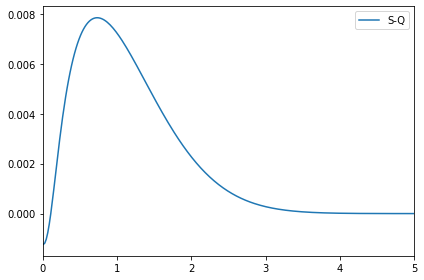

0
0
B-B: 0.0 and -0.009054432791902293
B-B: 7.275957614183426e-12 and 0.016437173874910213
0
1
Q-B: -1.2505552149377763e-12 and -0.002013327988578813
Q-B: 1.8189894035458565e-12 and 0.0040388814181335705
0
2
S-B: 2.6147972675971687e-12 and 0.005026177269787647
S-B: 3.637978807091713e-12 and -0.008384684885828948
0
3
E-B: 2.9558577807620168e-12 and -0.005539555669924639
E-B: 8.185452315956354e-12 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 8.185452315956354e-12 and 0.0
1
0
B-Q: -0.0020786053501069546 and -0.002013327988578813
B-Q: 0.006050110794603825 and 0.0040388814181335705
1
1
Q-Q: -0.003606187179684639 and -0.0035700967774267593
Q-Q: 0.04566485807299614 and 0.0264456784429629
1
2
S-Q: -9.180118649965152e-05 and -0.0010285177534370906
S-Q: 0.046496644616127014 and 0.0064872902286939385
1
3
E-Q: -0.001734726713038981 and -0.0021987586350709068
E-Q: 0.05010823905467987 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.05010823905467987 and 0.0
2
0
B-S: 1.8189894035458565e-12

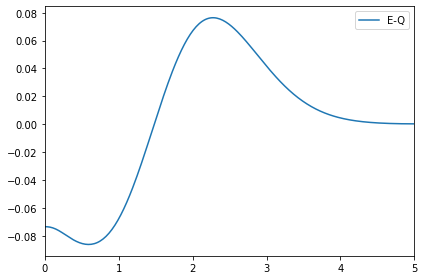

0
0
B-B: 0.0 and -0.009054432791902293
B-B: 9.094947017729282e-13 and 0.016437173874910213
0
1
Q-B: 2.842170943040401e-14 and -0.002013327988578813
Q-B: 1.8189894035458565e-12 and 0.0040388814181335705
0
2
S-B: 2.2737367544323206e-13 and 0.005026177269787647
S-B: -9.094947017729282e-13 and -0.008384684885828948
0
3
E-B: 0.0 and -0.005539555669924639
E-B: 1.3642420526593924e-12 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 1.3642420526593924e-12 and 0.0
1
0
B-Q: 1.4551915228366852e-11 and -0.002013327988578813
B-Q: 2.9103830456733704e-11 and 0.0040388814181335705
1
1
Q-Q: 0.0 and -0.0035700967774267593
Q-Q: 1.4551915228366852e-11 and 0.0264456784429629
1
2
S-Q: -1.8189894035458565e-12 and -0.0010285177534370906
S-Q: 0.0 and 0.0064872902286939385
1
3
E-Q: 0.0 and -0.0021987586350709068
E-Q: 7.275957614183426e-12 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 7.275957614183426e-12 and 0.0
2
0
B-S: -5.684341886080802e-14 and 0.005026177269787647
B-S: -7.275957614183426e-12 and -0.

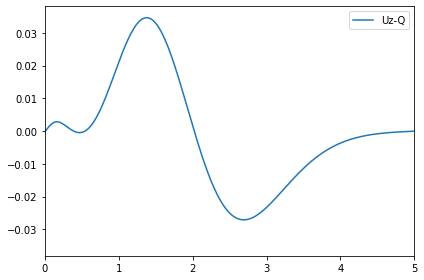

0
0
B-B: 0.0 and -0.009054432791902293
B-B: 0.0 and 0.016437173874910213
0
1
Q-B: 0.0 and -0.002013327988578813
Q-B: 0.0 and 0.0040388814181335705
0
2
S-B: 0.0 and 0.005026177269787647
S-B: 0.0 and -0.008384684885828948
0
3
E-B: 0.0 and -0.005539555669924639
E-B: 0.0 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 0.0 and 0.0
1
0
B-Q: 0.0 and -0.002013327988578813
B-Q: 0.0 and 0.0040388814181335705
1
1
Q-Q: 0.0 and -0.0035700967774267593
Q-Q: 0.0 and 0.0264456784429629
1
2
S-Q: 0.0 and -0.0010285177534370906
S-Q: 0.0 and 0.0064872902286939385
1
3
E-Q: 0.0 and -0.0021987586350709068
E-Q: 0.0 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.0 and 0.0
2
0
B-S: 0.005038743373006582 and 0.005026177269787647
B-S: -0.008388632908463478 and -0.008384684885828948
2
1
Q-S: 1.9895196601282805e-13 and -0.0010285177534370906
Q-S: -0.008388632908463478 and 0.0064872902286939385
2
2
S-S: 3.751665644813329e-12 and -0.0071255926299324205
S-S: -0.008388633839786053 and 0.02136097072569792
2
3
E-S

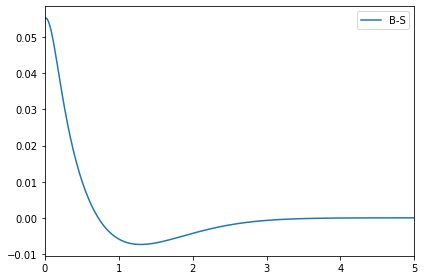

0
0
B-B: 0.0 and -0.009054432791902293
B-B: 0.0 and 0.016437173874910213
0
1
Q-B: 0.0 and -0.002013327988578813
Q-B: 0.0 and 0.0040388814181335705
0
2
S-B: 0.0 and 0.005026177269787647
S-B: 0.0 and -0.008384684885828948
0
3
E-B: 0.0 and -0.005539555669924639
E-B: 0.0 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 0.0 and 0.0
1
0
B-Q: 0.0 and -0.002013327988578813
B-Q: 0.0 and 0.0040388814181335705
1
1
Q-Q: 0.0 and -0.0035700967774267593
Q-Q: 0.0 and 0.0264456784429629
1
2
S-Q: 0.0 and -0.0010285177534370906
S-Q: 0.0 and 0.0064872902286939385
1
3
E-Q: 0.0 and -0.0021987586350709068
E-Q: 0.0 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.0 and 0.0
2
0
B-S: -1.3642420526593924e-12 and 0.005026177269787647
B-S: -1.4779288903810084e-12 and -0.008384684885828948
2
1
Q-S: -0.0010310941142961383 and -0.0010285177534370906
Q-S: 0.006490344647318125 and 0.0064872902286939385
2
2
S-S: 1.0231815394945443e-12 and -0.0071255926299324205
S-S: 0.006490344647318125 and 0.02136097072569792
2
3

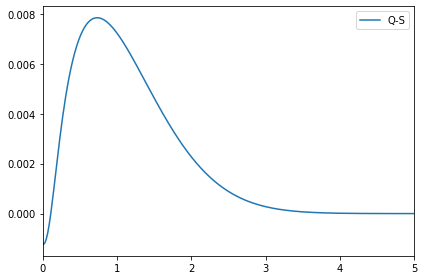

0
0
B-B: 0.0 and -0.009054432791902293
B-B: 0.0 and 0.016437173874910213
0
1
Q-B: 0.0 and -0.002013327988578813
Q-B: 0.0 and 0.0040388814181335705
0
2
S-B: 0.0 and 0.005026177269787647
S-B: 0.0 and -0.008384684885828948
0
3
E-B: 0.0 and -0.005539555669924639
E-B: 0.0 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 0.0 and 0.0
1
0
B-Q: 0.0 and -0.002013327988578813
B-Q: 0.0 and 0.0040388814181335705
1
1
Q-Q: 0.0 and -0.0035700967774267593
Q-Q: 0.0 and 0.0264456784429629
1
2
S-Q: 0.0 and -0.0010285177534370906
S-Q: 0.0 and 0.0064872902286939385
1
3
E-Q: 0.0 and -0.0021987586350709068
E-Q: 0.0 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.0 and 0.0
2
0
B-S: 0.0 and 0.005026177269787647
B-S: 0.0 and -0.008384684885828948
2
1
Q-S: 0.0 and -0.0010285177534370906
Q-S: 0.0 and 0.0064872902286939385
2
2
S-S: -0.007143418304622173 and -0.0071255926299324205
S-S: 0.021371029317378998 and 0.02136097072569792
2
3
E-S: 0.0 and -0.0002081283994401784
E-S: 0.021371029317378998 and -0.0010212

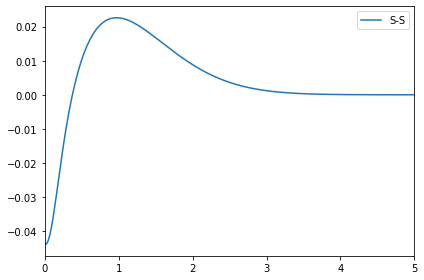

0
0
B-B: 0.0 and -0.009054432791902293
B-B: 0.0 and 0.016437173874910213
0
1
Q-B: 0.0 and -0.002013327988578813
Q-B: 0.0 and 0.0040388814181335705
0
2
S-B: 0.0 and 0.005026177269787647
S-B: 0.0 and -0.008384684885828948
0
3
E-B: 0.0 and -0.005539555669924639
E-B: 0.0 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 0.0 and 0.0
1
0
B-Q: 0.0 and -0.002013327988578813
B-Q: 0.0 and 0.0040388814181335705
1
1
Q-Q: 0.0 and -0.0035700967774267593
Q-Q: 0.0 and 0.0264456784429629
1
2
S-Q: 0.0 and -0.0010285177534370906
S-Q: 0.0 and 0.0064872902286939385
1
3
E-Q: 0.0 and -0.0021987586350709068
E-Q: 0.0 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.0 and 0.0
2
0
B-S: 0.005316921044141054 and 0.005026177269787647
B-S: -0.012559982016682625 and -0.008384684885828948
2
1
Q-S: -0.00091451162006706 and -0.0010285177534370906
Q-S: -0.002842236077412963 and 0.0064872902286939385
2
2
S-S: -0.000695878523401916 and -0.0071255926299324205
S-S: -0.00010337484127376229 and 0.02136097072569792
2
3
E-S

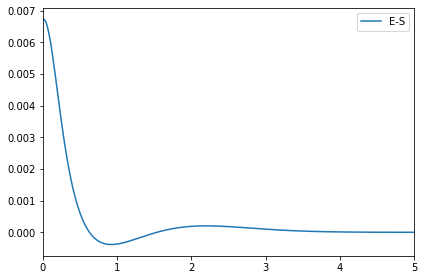

0
0
B-B: 0.0 and -0.009054432791902293
B-B: 0.0 and 0.016437173874910213
0
1
Q-B: 0.0 and -0.002013327988578813
Q-B: 0.0 and 0.0040388814181335705
0
2
S-B: 0.0 and 0.005026177269787647
S-B: 0.0 and -0.008384684885828948
0
3
E-B: 0.0 and -0.005539555669924639
E-B: 0.0 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 0.0 and 0.0
1
0
B-Q: 0.0 and -0.002013327988578813
B-Q: 0.0 and 0.0040388814181335705
1
1
Q-Q: 0.0 and -0.0035700967774267593
Q-Q: 0.0 and 0.0264456784429629
1
2
S-Q: 0.0 and -0.0010285177534370906
S-Q: 0.0 and 0.0064872902286939385
1
3
E-Q: 0.0 and -0.0021987586350709068
E-Q: 0.0 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.0 and 0.0
2
0
B-S: -1.1641532182693481e-10 and 0.005026177269787647
B-S: 0.0 and -0.008384684885828948
2
1
Q-S: 0.0 and -0.0010285177534370906
Q-S: -5.820766091346741e-11 and 0.0064872902286939385
2
2
S-S: 7.275957614183426e-12 and -0.0071255926299324205
S-S: 5.820766091346741e-11 and 0.02136097072569792
2
3
E-S: -9.094947017729282e-13 and -0.0

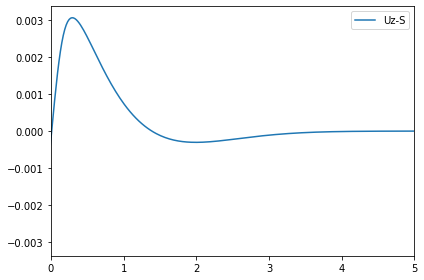

0
0
B-B: -0.009480057284235954 and -0.009054432791902293
B-B: 0.024622345343232155 and 0.016437173874910213
0
1
Q-B: 1.4779288903810084e-12 and -0.002013327988578813
Q-B: 0.024622343480587006 and 0.0040388814181335705
0
2
S-B: 0.0 and 0.005026177269787647
S-B: 0.024622347205877304 and -0.008384684885828948
0
3
E-B: 3.728928277269006e-11 and -0.005539555669924639
E-B: 0.024622345343232155 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 0.024622345343232155 and 0.0
1
0
B-Q: -0.002078605815768242 and -0.002013327988578813
B-Q: 0.030672457069158554 and 0.0040388814181335705
1
1
Q-Q: -2.2168933355715126e-12 and -0.0035700967774267593
Q-Q: 0.030672455206513405 and 0.0264456784429629
1
2
S-Q: 3.268496584496461e-13 and -0.0010285177534370906
S-Q: 0.030672457069158554 and 0.0064872902286939385
1
3
E-Q: -4.320099833421409e-12 and -0.0021987586350709068
E-Q: 0.030672457069158554 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.030672457069158554 and 0.0
2
0
B-S: 0.0005081762792542577 and 0

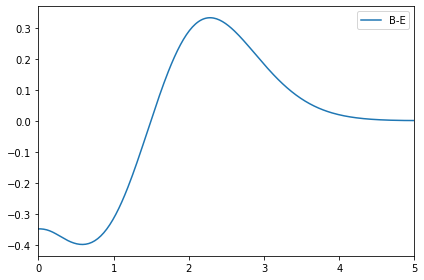

0
0
B-B: 0.0 and -0.009054432791902293
B-B: 7.275957614183426e-12 and 0.016437173874910213
0
1
Q-B: -0.0020786053501069546 and -0.002013327988578813
Q-B: 0.006050110794603825 and 0.0040388814181335705
0
2
S-B: 1.8189894035458565e-12 and 0.005026177269787647
S-B: 0.006050110794603825 and -0.008384684885828948
0
3
E-B: 0.0 and -0.005539555669924639
E-B: 0.006050110794603825 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 0.006050110794603825 and 0.0
1
0
B-Q: -1.2505552149377763e-12 and -0.002013327988578813
B-Q: 0.006050110794603825 and 0.0040388814181335705
1
1
Q-Q: -0.003606187179684639 and -0.0035700967774267593
Q-Q: 0.04566485807299614 and 0.0264456784429629
1
2
S-Q: 1.7763568394002505e-13 and -0.0010285177534370906
S-Q: 0.04566485434770584 and 0.0064872902286939385
1
3
E-Q: -1.4495071809506044e-12 and -0.0021987586350709068
E-Q: 0.04566485807299614 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.04566485807299614 and 0.0
2
0
B-S: 2.6147972675971687e-12 and 0.0050261772697876

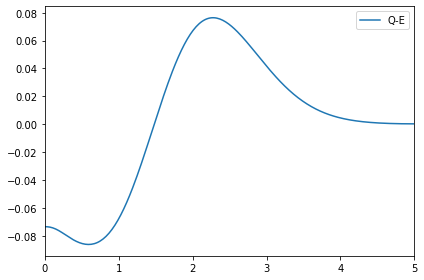

0
0
B-B: 0.0 and -0.009054432791902293
B-B: 0.0 and 0.016437173874910213
0
1
Q-B: 0.0 and -0.002013327988578813
Q-B: 0.0 and 0.0040388814181335705
0
2
S-B: 0.005316921044141054 and 0.005026177269787647
S-B: -0.012559982016682625 and -0.008384684885828948
0
3
E-B: 0.0 and -0.005539555669924639
E-B: -0.012559982016682625 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: -0.012559982016682625 and 0.0
1
0
B-Q: 0.0 and -0.002013327988578813
B-Q: -0.012559982016682625 and 0.0040388814181335705
1
1
Q-Q: 0.0 and -0.0035700967774267593
Q-Q: -0.012559982016682625 and 0.0264456784429629
1
2
S-Q: -0.00091451162006706 and -0.0010285177534370906
S-Q: -0.002842236077412963 and 0.0064872902286939385
1
3
E-Q: 0.0 and -0.0021987586350709068
E-Q: -0.002842236077412963 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: -0.002842236077412963 and 0.0
2
0
B-S: 0.0 and 0.005026177269787647
B-S: -0.002842236077412963 and -0.008384684885828948
2
1
Q-S: 0.0 and -0.0010285177534370906
Q-S: -0.002842236077412963 

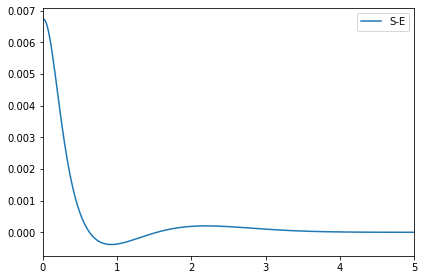

0
0
B-B: -0.011164539493620396 and -0.009054432791902293
B-B: 0.03686610236763954 and 0.016437173874910213
0
1
Q-B: -0.0024268950801342726 and -0.002013327988578813
Q-B: 0.045924700796604156 and 0.0040388814181335705
0
2
S-B: 0.0005892773624509573 and 0.005026177269787647
S-B: 0.044315043836832047 and -0.008384684885828948
0
3
E-B: -0.004662574268877506 and -0.005539555669924639
E-B: 0.058592576533555984 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 0.058592576533555984 and 0.0
1
0
B-Q: -0.0024268950801342726 and -0.002013327988578813
B-Q: 0.0676511749625206 and 0.0040388814181335705
1
1
Q-Q: -0.004076304845511913 and -0.0035700967774267593
Q-Q: 0.12696483731269836 and 0.0264456784429629
1
2
S-Q: -9.329321619588882e-05 and -0.0010285177534370906
S-Q: 0.12821023166179657 and 0.0064872902286939385
1
3
E-Q: -0.0018618344329297543 and -0.0021987586350709068
E-Q: 0.13361772894859314 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.13361772894859314 and 0.0
2
0
B-S: 0.00058927736245

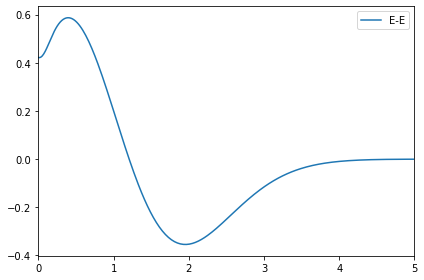

0
0
B-B: 0.0 and -0.009054432791902293
B-B: 2.3283064365386963e-10 and 0.016437173874910213
0
1
Q-B: 3.637978807091713e-12 and -0.002013327988578813
Q-B: 2.3283064365386963e-10 and 0.0040388814181335705
0
2
S-B: 0.0 and 0.005026177269787647
S-B: -1.1641532182693481e-10 and -0.008384684885828948
0
3
E-B: 2.9103830456733704e-11 and -0.005539555669924639
E-B: 1.1641532182693481e-10 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 1.1641532182693481e-10 and 0.0
1
0
B-Q: -4.3655745685100555e-11 and -0.002013327988578813
B-Q: 0.0 and 0.0040388814181335705
1
1
Q-Q: 3.637978807091713e-12 and -0.0035700967774267593
Q-Q: -1.1641532182693481e-10 and 0.0264456784429629
1
2
S-Q: 0.0 and -0.0010285177534370906
S-Q: 1.1641532182693481e-10 and 0.0064872902286939385
1
3
E-Q: 0.0 and -0.0021987586350709068
E-Q: 1.1641532182693481e-10 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 1.1641532182693481e-10 and 0.0
2
0
B-S: -1.4551915228366852e-11 and 0.005026177269787647
B-S: -1.1641532182693481e-10 a

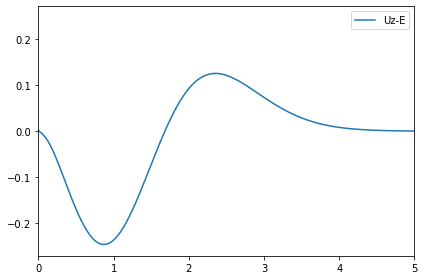

0
0
B-B: 2.3283064365386963e-10 and -0.009054432791902293
B-B: 1.1641532182693481e-10 and 0.016437173874910213
0
1
Q-B: 0.0 and -0.002013327988578813
Q-B: -1.1641532182693481e-10 and 0.0040388814181335705
0
2
S-B: 1.1368683772161603e-13 and 0.005026177269787647
S-B: 1.1641532182693481e-10 and -0.008384684885828948
0
3
E-B: 0.0 and -0.005539555669924639
E-B: -1.1641532182693481e-10 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: -1.1641532182693481e-10 and 0.0
1
0
B-Q: 0.0 and -0.002013327988578813
B-Q: 0.0 and 0.0040388814181335705
1
1
Q-Q: 5.684341886080802e-14 and -0.0035700967774267593
Q-Q: 2.3283064365386963e-10 and 0.0264456784429629
1
2
S-Q: 0.0 and -0.0010285177534370906
S-Q: 0.0 and 0.0064872902286939385
1
3
E-Q: 5.684341886080802e-14 and -0.0021987586350709068
E-Q: 0.0 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.0 and 0.0
2
0
B-S: -3.637978807091713e-12 and 0.005026177269787647
B-S: 5.820766091346741e-11 and -0.008384684885828948
2
1
Q-S: 0.0 and -0.001028517753437

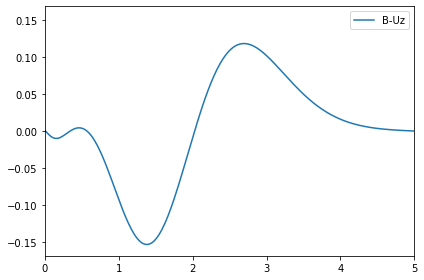

0
0
B-B: 0.0 and -0.009054432791902293
B-B: -9.094947017729282e-13 and 0.016437173874910213
0
1
Q-B: -1.4551915228366852e-11 and -0.002013327988578813
Q-B: 0.0 and 0.0040388814181335705
0
2
S-B: 5.684341886080802e-14 and 0.005026177269787647
S-B: 0.0 and -0.008384684885828948
0
3
E-B: -2.2737367544323206e-13 and -0.005539555669924639
E-B: -2.9103830456733704e-11 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: -2.9103830456733704e-11 and 0.0
1
0
B-Q: -2.842170943040401e-14 and -0.002013327988578813
B-Q: 2.9103830456733704e-11 and 0.0040388814181335705
1
1
Q-Q: 0.0 and -0.0035700967774267593
Q-Q: 1.4551915228366852e-11 and 0.0264456784429629
1
2
S-Q: 0.0 and -0.0010285177534370906
S-Q: 7.275957614183426e-12 and 0.0064872902286939385
1
3
E-Q: 0.0 and -0.0021987586350709068
E-Q: 0.0 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.0 and 0.0
2
0
B-S: -2.2737367544323206e-13 and 0.005026177269787647
B-S: 7.275957614183426e-12 and -0.008384684885828948
2
1
Q-S: 1.8189894035458565e-12 a

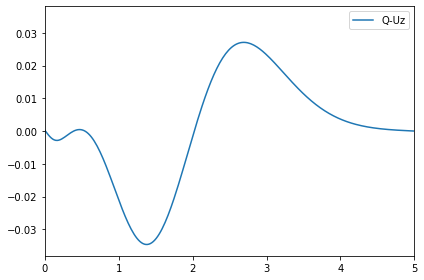

0
0
B-B: 0.0 and -0.009054432791902293
B-B: 0.0 and 0.016437173874910213
0
1
Q-B: 0.0 and -0.002013327988578813
Q-B: 0.0 and 0.0040388814181335705
0
2
S-B: 1.1641532182693481e-10 and 0.005026177269787647
S-B: 0.0 and -0.008384684885828948
0
3
E-B: 0.0 and -0.005539555669924639
E-B: 0.0 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 0.0 and 0.0
1
0
B-Q: 0.0 and -0.002013327988578813
B-Q: 0.0 and 0.0040388814181335705
1
1
Q-Q: 0.0 and -0.0035700967774267593
Q-Q: 0.0 and 0.0264456784429629
1
2
S-Q: 0.0 and -0.0010285177534370906
S-Q: 5.820766091346741e-11 and 0.0064872902286939385
1
3
E-Q: 0.0 and -0.0021987586350709068
E-Q: 5.820766091346741e-11 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 5.820766091346741e-11 and 0.0
2
0
B-S: 0.0 and 0.005026177269787647
B-S: 5.820766091346741e-11 and -0.008384684885828948
2
1
Q-S: 0.0 and -0.0010285177534370906
Q-S: 5.820766091346741e-11 and 0.0064872902286939385
2
2
S-S: -7.275957614183426e-12 and -0.0071255926299324205
S-S: -5.820766091346

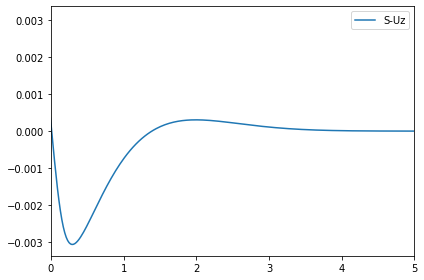

0
0
B-B: 0.0 and -0.009054432791902293
B-B: -2.3283064365386963e-10 and 0.016437173874910213
0
1
Q-B: 4.3655745685100555e-11 and -0.002013327988578813
Q-B: -4.656612873077393e-10 and 0.0040388814181335705
0
2
S-B: 1.4551915228366852e-11 and 0.005026177269787647
S-B: 0.0 and -0.008384684885828948
0
3
E-B: -2.9103830456733704e-11 and -0.005539555669924639
E-B: -4.656612873077393e-10 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: -4.656612873077393e-10 and 0.0
1
0
B-Q: -3.637978807091713e-12 and -0.002013327988578813
B-Q: -2.3283064365386963e-10 and 0.0040388814181335705
1
1
Q-Q: -3.637978807091713e-12 and -0.0035700967774267593
Q-Q: 2.3283064365386963e-10 and 0.0264456784429629
1
2
S-Q: -2.2737367544323206e-13 and -0.0010285177534370906
S-Q: -2.3283064365386963e-10 and 0.0064872902286939385
1
3
E-Q: 1.8189894035458565e-12 and -0.0021987586350709068
E-Q: -2.3283064365386963e-10 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: -2.3283064365386963e-10 and 0.0
2
0
B-S: 0.0 and 0.005026

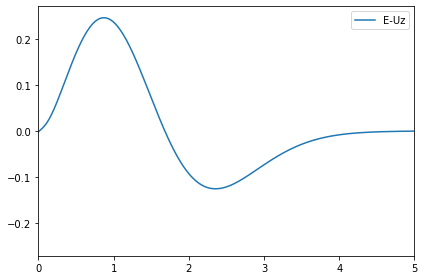

0
0
B-B: 8.731149137020111e-11 and -0.009054432791902293
B-B: 2.9103830456733704e-11 and 0.016437173874910213
0
1
Q-B: 4.092726157978177e-12 and -0.002013327988578813
Q-B: -3.637978807091713e-12 and 0.0040388814181335705
0
2
S-B: 2.2737367544323206e-11 and 0.005026177269787647
S-B: 1.4551915228366852e-11 and -0.008384684885828948
0
3
E-B: 9.094947017729282e-12 and -0.005539555669924639
E-B: 0.0 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 0.0 and 0.0
1
0
B-Q: 4.092726157978177e-12 and -0.002013327988578813
B-Q: -1.0913936421275139e-11 and 0.0040388814181335705
1
1
Q-Q: -2.1032064978498966e-12 and -0.0035700967774267593
Q-Q: -1.4551915228366852e-11 and 0.0264456784429629
1
2
S-Q: 1.8474111129762605e-13 and -0.0010285177534370906
S-Q: 2.1827872842550278e-11 and 0.0064872902286939385
1
3
E-Q: -6.252776074688882e-13 and -0.0021987586350709068
E-Q: 3.2741809263825417e-11 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 3.2741809263825417e-11 and 0.0
2
0
B-S: 2.2737367544323206e-11 a

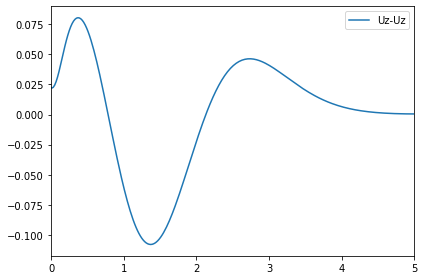

In [26]:
times=np.linspace(1,11,499)
x123=np.linspace(-10,10,2*Neta)
for i1,l1 in enumerate(['B','Q','S','E','Uz']):
    for i2,k1 in enumerate(['B','Q','S','E','Uz']):
        ic=np.zeros(2*Neta,dtype=np.float32)
        full_corr=np.zeros(2*Neta,dtype=np.float32)
        for j1,l2 in enumerate(['B','Q','S','E','U']):
            for j2,k2 in enumerate(['B','Q','S','E','U']):
                print(j1)
                print(j2)
                dfl=np.loadtxt("Green-"+l2+"-"+l1+".dat")/50
                dfk=np.loadtxt("Green-"+k2+"-"+k1+".dat")/50
                dt=1e-5          
                Gs=np.zeros(2*Neta,dtype=np.float32)
                j=lambda x:(Chi_matrix[j1][j2](x+dt)-Chi_matrix[j1][j2](x-dt))/(2*dt)+1./x*Chi_matrix[j1][j2](x)
                jl=lambda x:Chi_matrix[i1][i1](x)
                jk=lambda x:Chi_matrix[i2][i2](x)
                for m in np.arange(499): 
                    for n in np.arange(0,2*Neta):
                        Gs[n]+=50*times[m]*j(times[m])*np.sum(dfl[m]*np.roll(dfk[m],shift=n))*10/499
                print("{}-{}: {} and {}".format(k2,l2,np.sum(Gs/2/50),np.sum(j(times)*times)/(11**2)*10/500))
                for n in np.arange(0,2*Neta):
                    ic[n]+=times[0]*Chi_matrix[j1][j2](times[0])*np.sum(dfl[0]*np.roll(dfk[0],shift=n))*50
                print("{}-{}: {} and {}".format(k2,l2,np.sum(ic/2/50),Chi_matrix[j1][j2](1)/11**2))
                full_corr+=(Gs)/np.sqrt(jl(times[-1])*jk(times[-1]))
        full_corr+=full_corr+ic/np.sqrt(jl(times[-1])*jk(times[-1]))
        plt.plot(x123,full_corr,label="{}-{}".format(k1,l1,k2,l2))
        np.savetxt("{}-{}.dat".format(k1,l1),full_corr)
        plt.legend()
        plt.xlim(0,5)
        plt.tight_layout()
        plt.savefig("Correlations-{}-{}.pdf".format(l1,k1),format='pdf')
        plt.show()
             

In [38]:
 nLQ([smuB(8/11,150/197),-0.092428 ,  0.9637427],150/197)

0.6323874027037671

In [35]:
8/11*0.4

0.29090909090909095

0
0
B-B: -0.009077073074877262 and -0.009054432791902293
B-B: 0.016444914042949677 and 0.016437173874910213
0
1
Q-B: -3.979039320256561e-13 and -0.002013327988578813
Q-B: 0.016444914042949677 and 0.0040388814181335705
0
2
S-B: -1.0800249583553523e-12 and 0.005026177269787647
S-B: 0.016444914042949677 and -0.008384684885828948
0
3
E-B: -8.640199666842818e-12 and -0.005539555669924639
E-B: 0.016444914042949677 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 0.016444914042949677 and 0.0
1
0
B-Q: -3.979039320256561e-13 and -0.002013327988578813
B-Q: 0.016444914042949677 and 0.0040388814181335705
1
1
Q-Q: 1.9539925233402755e-14 and -0.0035700967774267593
Q-Q: 0.016444914042949677 and 0.0264456784429629
1
2
S-Q: 2.4424906541753444e-15 and -0.0010285177534370906
S-Q: 0.016444914042949677 and 0.0064872902286939385
1
3
E-Q: 4.618527782440651e-14 and -0.0021987586350709068
E-Q: 0.016444914042949677 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.016444914042949677 and 0.0
2
0
B-S: -1.080

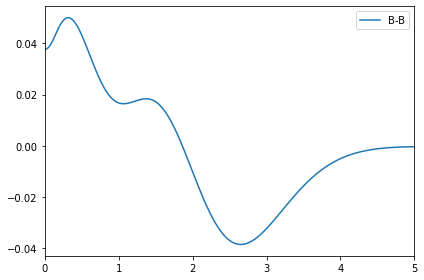

0
0
B-B: 1.0913936421275139e-11 and -0.009054432791902293
B-B: 4.547473508864641e-13 and 0.016437173874910213
0
1
Q-B: -0.002018362982198596 and -0.002013327988578813
Q-B: 0.004040783271193504 and 0.0040388814181335705
0
2
S-B: -3.410605131648481e-13 and 0.005026177269787647
S-B: 0.004040782805532217 and -0.008384684885828948
0
3
E-B: -1.0231815394945443e-12 and -0.005539555669924639
E-B: 0.004040782805532217 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 0.004040782805532217 and 0.0
1
0
B-Q: 1.7763568394002505e-15 and -0.002013327988578813
B-Q: 0.004040782805532217 and 0.0040388814181335705
1
1
Q-Q: -1.8758328224066645e-12 and -0.0035700967774267593
Q-Q: 0.00404078233987093 and 0.0264456784429629
1
2
S-Q: -1.1657341758564144e-15 and -0.0010285177534370906
S-Q: 0.004040783271193504 and 0.0064872902286939385
1
3
E-Q: -2.220446049250313e-14 and -0.0021987586350709068
E-Q: 0.004040782805532217 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.004040782805532217 and 0.0
2
0
B-S: -2.

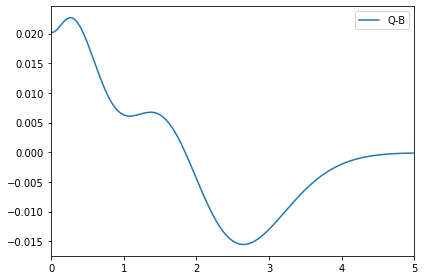

0
0
B-B: 0.0 and -0.009054432791902293
B-B: 0.0 and 0.016437173874910213
0
1
Q-B: 0.0 and -0.002013327988578813
Q-B: 0.0 and 0.0040388814181335705
0
2
S-B: 0.005038743373006582 and 0.005026177269787647
S-B: -0.008388632908463478 and -0.008384684885828948
0
3
E-B: 0.0 and -0.005539555669924639
E-B: -0.008388632908463478 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: -0.008388632908463478 and 0.0
1
0
B-Q: 0.0 and -0.002013327988578813
B-Q: -0.008388632908463478 and 0.0040388814181335705
1
1
Q-Q: 0.0 and -0.0035700967774267593
Q-Q: -0.008388632908463478 and 0.0264456784429629
1
2
S-Q: 1.9895196601282805e-13 and -0.0010285177534370906
S-Q: -0.008388632908463478 and 0.0064872902286939385
1
3
E-Q: 0.0 and -0.0021987586350709068
E-Q: -0.008388632908463478 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: -0.008388632908463478 and 0.0
2
0
B-S: 0.0 and 0.005026177269787647
B-S: -0.008388632908463478 and -0.008384684885828948
2
1
Q-S: 0.0 and -0.0010285177534370906
Q-S: -0.00838863290846347

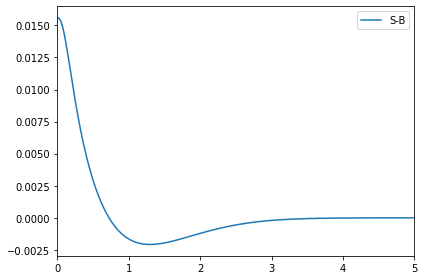

0
0
B-B: 1.0913936421275139e-11 and -0.009054432791902293
B-B: 4.547473508864641e-13 and 0.016437173874910213
0
1
Q-B: 1.7763568394002505e-15 and -0.002013327988578813
Q-B: 4.092726157978177e-12 and 0.0040388814181335705
0
2
S-B: -2.4868995751603507e-14 and 0.005026177269787647
S-B: 5.4569682106375694e-12 and -0.008384684885828948
0
3
E-B: -3.126388037344441e-13 and -0.005539555669924639
E-B: 1.8189894035458565e-12 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 1.8189894035458565e-12 and 0.0
1
0
B-Q: -0.002018362982198596 and -0.002013327988578813
B-Q: 0.004040783271193504 and 0.0040388814181335705
1
1
Q-Q: -1.8758328224066645e-12 and -0.0035700967774267593
Q-Q: 0.004040783271193504 and 0.0264456784429629
1
2
S-Q: 5.400124791776761e-13 and -0.0010285177534370906
S-Q: 0.004040783271193504 and 0.0064872902286939385
1
3
E-Q: -2.0463630789890885e-12 and -0.0021987586350709068
E-Q: 0.004040783271193504 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.004040783271193504 and 0.0
2
0
B

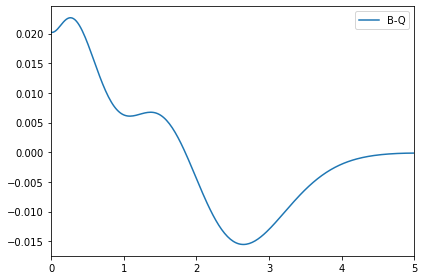

0
0
B-B: 4.831690603168681e-13 and -0.009054432791902293
B-B: -6.039613253960852e-14 and 0.016437173874910213
0
1
Q-B: -3.410605131648481e-13 and -0.002013327988578813
Q-B: 1.1368683772161603e-12 and 0.0040388814181335705
0
2
S-B: 8.881784197001252e-15 and 0.005026177269787647
S-B: -2.8421709430404007e-13 and -0.008384684885828948
0
3
E-B: -1.0658141036401503e-14 and -0.005539555669924639
E-B: 2.2737367544323206e-13 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 2.2737367544323206e-13 and 0.0
1
0
B-Q: -3.410605131648481e-13 and -0.002013327988578813
B-Q: 1.1368683772161603e-13 and 0.0040388814181335705
1
1
Q-Q: -0.003579031443223357 and -0.0035700967774267593
Q-Q: 0.026458125561475754 and 0.0264456784429629
1
2
S-Q: 1.4210854715202004e-13 and -0.0010285177534370906
S-Q: 0.026458125561475754 and 0.0064872902286939385
1
3
E-Q: -1.3642420526593924e-12 and -0.0021987586350709068
E-Q: 0.026458127424120903 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.026458127424120903 and 0.0
2


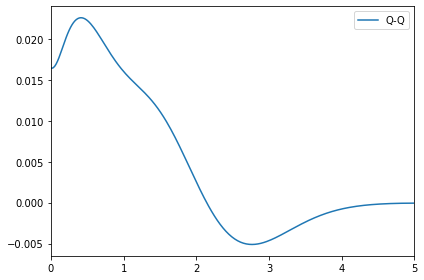

0
0
B-B: 0.0 and -0.009054432791902293
B-B: 0.0 and 0.016437173874910213
0
1
Q-B: 0.0 and -0.002013327988578813
Q-B: 0.0 and 0.0040388814181335705
0
2
S-B: -1.3642420526593924e-12 and 0.005026177269787647
S-B: -1.4779288903810084e-12 and -0.008384684885828948
0
3
E-B: 0.0 and -0.005539555669924639
E-B: -1.4779288903810084e-12 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: -1.4779288903810084e-12 and 0.0
1
0
B-Q: 0.0 and -0.002013327988578813
B-Q: -1.4779288903810084e-12 and 0.0040388814181335705
1
1
Q-Q: 0.0 and -0.0035700967774267593
Q-Q: -1.4779288903810084e-12 and 0.0264456784429629
1
2
S-Q: -0.0010310941142961383 and -0.0010285177534370906
S-Q: 0.006490344647318125 and 0.0064872902286939385
1
3
E-Q: 0.0 and -0.0021987586350709068
E-Q: 0.006490344647318125 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.006490344647318125 and 0.0
2
0
B-S: 0.0 and 0.005026177269787647
B-S: 0.006490344647318125 and -0.008384684885828948
2
1
Q-S: 0.0 and -0.0010285177534370906
Q-S: 0.006490344

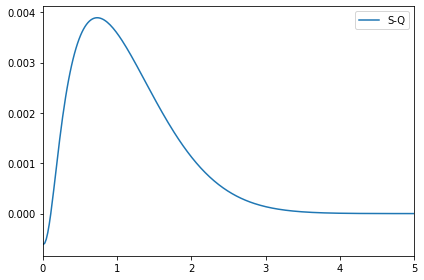

0
0
B-B: 0.0 and -0.009054432791902293
B-B: 0.0 and 0.016437173874910213
0
1
Q-B: 0.0 and -0.002013327988578813
Q-B: 0.0 and 0.0040388814181335705
0
2
S-B: 0.0 and 0.005026177269787647
S-B: 0.0 and -0.008384684885828948
0
3
E-B: 0.0 and -0.005539555669924639
E-B: 0.0 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 0.0 and 0.0
1
0
B-Q: 0.0 and -0.002013327988578813
B-Q: 0.0 and 0.0040388814181335705
1
1
Q-Q: 0.0 and -0.0035700967774267593
Q-Q: 0.0 and 0.0264456784429629
1
2
S-Q: 0.0 and -0.0010285177534370906
S-Q: 0.0 and 0.0064872902286939385
1
3
E-Q: 0.0 and -0.0021987586350709068
E-Q: 0.0 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.0 and 0.0
2
0
B-S: 0.005038743373006582 and 0.005026177269787647
B-S: -0.008388632908463478 and -0.008384684885828948
2
1
Q-S: 1.9895196601282805e-13 and -0.0010285177534370906
Q-S: -0.008388632908463478 and 0.0064872902286939385
2
2
S-S: 3.751665644813329e-12 and -0.0071255926299324205
S-S: -0.008388633839786053 and 0.02136097072569792
2
3
E-S

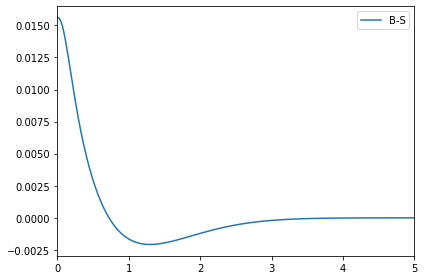

0
0
B-B: 0.0 and -0.009054432791902293
B-B: 0.0 and 0.016437173874910213
0
1
Q-B: 0.0 and -0.002013327988578813
Q-B: 0.0 and 0.0040388814181335705
0
2
S-B: 0.0 and 0.005026177269787647
S-B: 0.0 and -0.008384684885828948
0
3
E-B: 0.0 and -0.005539555669924639
E-B: 0.0 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 0.0 and 0.0
1
0
B-Q: 0.0 and -0.002013327988578813
B-Q: 0.0 and 0.0040388814181335705
1
1
Q-Q: 0.0 and -0.0035700967774267593
Q-Q: 0.0 and 0.0264456784429629
1
2
S-Q: 0.0 and -0.0010285177534370906
S-Q: 0.0 and 0.0064872902286939385
1
3
E-Q: 0.0 and -0.0021987586350709068
E-Q: 0.0 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.0 and 0.0
2
0
B-S: -1.3642420526593924e-12 and 0.005026177269787647
B-S: -1.4779288903810084e-12 and -0.008384684885828948
2
1
Q-S: -0.0010310941142961383 and -0.0010285177534370906
Q-S: 0.006490344647318125 and 0.0064872902286939385
2
2
S-S: 1.0231815394945443e-12 and -0.0071255926299324205
S-S: 0.006490344647318125 and 0.02136097072569792
2
3

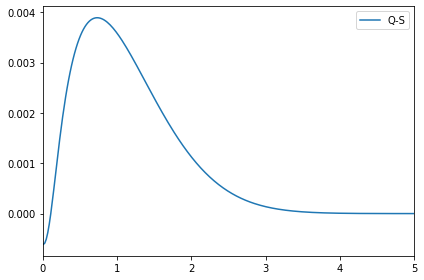

0
0
B-B: 0.0 and -0.009054432791902293
B-B: 0.0 and 0.016437173874910213
0
1
Q-B: 0.0 and -0.002013327988578813
Q-B: 0.0 and 0.0040388814181335705
0
2
S-B: 0.0 and 0.005026177269787647
S-B: 0.0 and -0.008384684885828948
0
3
E-B: 0.0 and -0.005539555669924639
E-B: 0.0 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 0.0 and 0.0
1
0
B-Q: 0.0 and -0.002013327988578813
B-Q: 0.0 and 0.0040388814181335705
1
1
Q-Q: 0.0 and -0.0035700967774267593
Q-Q: 0.0 and 0.0264456784429629
1
2
S-Q: 0.0 and -0.0010285177534370906
S-Q: 0.0 and 0.0064872902286939385
1
3
E-Q: 0.0 and -0.0021987586350709068
E-Q: 0.0 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.0 and 0.0
2
0
B-S: 0.0 and 0.005026177269787647
B-S: 0.0 and -0.008384684885828948
2
1
Q-S: 0.0 and -0.0010285177534370906
Q-S: 0.0 and 0.0064872902286939385
2
2
S-S: -0.007143418304622173 and -0.0071255926299324205
S-S: 0.021371029317378998 and 0.02136097072569792
2
3
E-S: 0.0 and -0.0002081283994401784
E-S: 0.021371029317378998 and -0.0010212

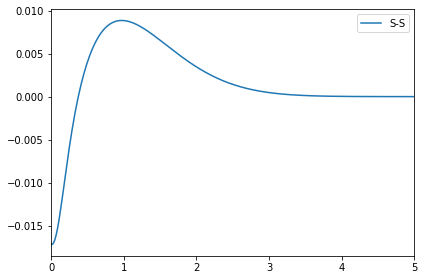

In [39]:
NQ_SUM=.63239
times=np.linspace(1,11,499)
x123=np.linspace(-10,10,2*Neta)
for i1,l1 in enumerate(['B','Q','S']):
    for i2,k1 in enumerate(['B','Q','S']):
        ic=np.zeros(2*Neta,dtype=np.float32)
        full_corr=np.zeros(2*Neta,dtype=np.float32)
        for j1,l2 in enumerate(['B','Q','S','E','U']):
            for j2,k2 in enumerate(['B','Q','S','E','U']):
                print(j1)
                print(j2)
                dfl=np.loadtxt("Green-"+l2+"-"+l1+".dat")/50
                dfk=np.loadtxt("Green-"+k2+"-"+k1+".dat")/50
                dt=1e-5          
                Gs=np.zeros(2*Neta,dtype=np.float32)
                j=lambda x:(Chi_matrix[j1][j2](x+dt)-Chi_matrix[j1][j2](x-dt))/(2*dt)+1./x*Chi_matrix[j1][j2](x)
                jl=lambda x:Chi_matrix[i1][i1](x)
                jk=lambda x:Chi_matrix[i2][i2](x)
                for m in np.arange(499): 
                    for n in np.arange(0,2*Neta):
                        Gs[n]+=50*times[m]*j(times[m])*np.sum(dfl[m]*np.roll(dfk[m],shift=n))*10/499
                print("{}-{}: {} and {}".format(k2,l2,np.sum(Gs/2/50),np.sum(j(times)*times)/(11**2)*10/500))
                for n in np.arange(0,2*Neta):
                    ic[n]+=times[0]*Chi_matrix[j1][j2](times[0])*np.sum(dfl[0]*np.roll(dfk[0],shift=n))*50
                print("{}-{}: {} and {}".format(k2,l2,np.sum(ic/2/50),Chi_matrix[j1][j2](1)/11**2))
                full_corr+=(Gs)/(NQ_SUM)**2
        full_corr+=full_corr+ic/(NQ_SUM)**2
        plt.plot(x123,full_corr,label="{}-{}".format(k1,l1,k2,l2))
        np.savetxt("{}-{}.dat".format(k1,l1),full_corr)
        plt.legend()
        plt.xlim(0,5)
        plt.tight_layout()
        plt.savefig("Correlations-{}-{}.pdf".format(l1,k1),format='pdf')
        plt.show()
             

0
0
B-B: -0.011164539493620396 and -0.009054432791902293
B-B: 0.03686610236763954 and 0.016437173874910213
0
1
Q-B: -0.0024268950801342726 and -0.002013327988578813
Q-B: 0.045924700796604156 and 0.0040388814181335705
0
2
S-B: 0.0005892773624509573 and 0.005026177269787647
S-B: 0.044315043836832047 and -0.008384684885828948
0
3
E-B: -0.004662574268877506 and -0.005539555669924639
E-B: 0.058592576533555984 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 0.058592576533555984 and 0.0
1
0
B-Q: -0.0024268950801342726 and -0.002013327988578813
B-Q: 0.0676511749625206 and 0.0040388814181335705
1
1
Q-Q: -0.004076304845511913 and -0.0035700967774267593
Q-Q: 0.12696483731269836 and 0.0264456784429629
1
2
S-Q: -9.329321619588882e-05 and -0.0010285177534370906
S-Q: 0.12821023166179657 and 0.0064872902286939385
1
3
E-Q: -0.0018618344329297543 and -0.0021987586350709068
E-Q: 0.13361772894859314 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 0.13361772894859314 and 0.0
2
0
B-S: 0.00058927736245

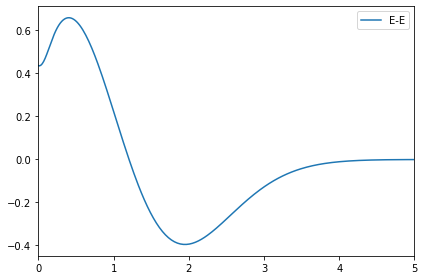

0
0
B-B: 0.0 and -0.009054432791902293
B-B: 2.3283064365386963e-10 and 0.016437173874910213
0
1
Q-B: 3.637978807091713e-12 and -0.002013327988578813
Q-B: 2.3283064365386963e-10 and 0.0040388814181335705
0
2
S-B: 0.0 and 0.005026177269787647
S-B: -1.1641532182693481e-10 and -0.008384684885828948
0
3
E-B: 2.9103830456733704e-11 and -0.005539555669924639
E-B: 1.1641532182693481e-10 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 1.1641532182693481e-10 and 0.0
1
0
B-Q: -4.3655745685100555e-11 and -0.002013327988578813
B-Q: 0.0 and 0.0040388814181335705
1
1
Q-Q: 3.637978807091713e-12 and -0.0035700967774267593
Q-Q: -1.1641532182693481e-10 and 0.0264456784429629
1
2
S-Q: 0.0 and -0.0010285177534370906
S-Q: 1.1641532182693481e-10 and 0.0064872902286939385
1
3
E-Q: 0.0 and -0.0021987586350709068
E-Q: 1.1641532182693481e-10 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 1.1641532182693481e-10 and 0.0
2
0
B-S: -1.4551915228366852e-11 and 0.005026177269787647
B-S: -1.1641532182693481e-10 a

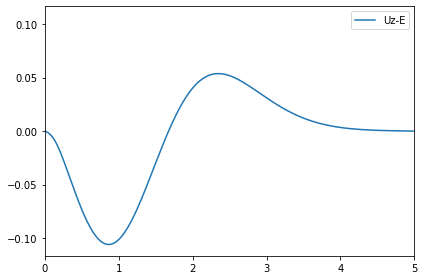

0
0
B-B: 0.0 and -0.009054432791902293
B-B: -2.3283064365386963e-10 and 0.016437173874910213
0
1
Q-B: 4.3655745685100555e-11 and -0.002013327988578813
Q-B: -4.656612873077393e-10 and 0.0040388814181335705
0
2
S-B: 1.4551915228366852e-11 and 0.005026177269787647
S-B: 0.0 and -0.008384684885828948
0
3
E-B: -2.9103830456733704e-11 and -0.005539555669924639
E-B: -4.656612873077393e-10 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: -4.656612873077393e-10 and 0.0
1
0
B-Q: -3.637978807091713e-12 and -0.002013327988578813
B-Q: -2.3283064365386963e-10 and 0.0040388814181335705
1
1
Q-Q: -3.637978807091713e-12 and -0.0035700967774267593
Q-Q: 2.3283064365386963e-10 and 0.0264456784429629
1
2
S-Q: -2.2737367544323206e-13 and -0.0010285177534370906
S-Q: -2.3283064365386963e-10 and 0.0064872902286939385
1
3
E-Q: 1.8189894035458565e-12 and -0.0021987586350709068
E-Q: -2.3283064365386963e-10 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: -2.3283064365386963e-10 and 0.0
2
0
B-S: 0.0 and 0.005026

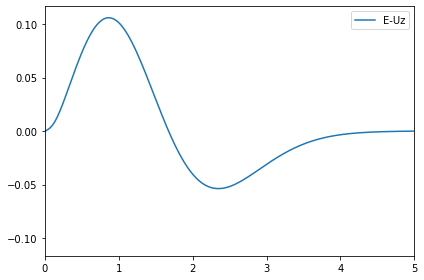

0
0
B-B: 8.731149137020111e-11 and -0.009054432791902293
B-B: 2.9103830456733704e-11 and 0.016437173874910213
0
1
Q-B: 4.092726157978177e-12 and -0.002013327988578813
Q-B: -3.637978807091713e-12 and 0.0040388814181335705
0
2
S-B: 2.2737367544323206e-11 and 0.005026177269787647
S-B: 1.4551915228366852e-11 and -0.008384684885828948
0
3
E-B: 9.094947017729282e-12 and -0.005539555669924639
E-B: 0.0 and 0.014619509050668764
0
4
U-B: 0.0 and 0.0
U-B: 0.0 and 0.0
1
0
B-Q: 4.092726157978177e-12 and -0.002013327988578813
B-Q: -1.0913936421275139e-11 and 0.0040388814181335705
1
1
Q-Q: -2.1032064978498966e-12 and -0.0035700967774267593
Q-Q: -1.4551915228366852e-11 and 0.0264456784429629
1
2
S-Q: 1.8474111129762605e-13 and -0.0010285177534370906
S-Q: 2.1827872842550278e-11 and 0.0064872902286939385
1
3
E-Q: -6.252776074688882e-13 and -0.0021987586350709068
E-Q: 3.2741809263825417e-11 and 0.005537026677249877
1
4
U-Q: 0.0 and 0.0
U-Q: 3.2741809263825417e-11 and 0.0
2
0
B-S: 2.2737367544323206e-11 a

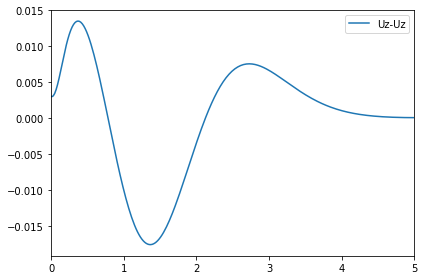

In [41]:
times=np.linspace(1,11,499)
x123=np.linspace(-10,10,2*Neta)
for i1,l1 in enumerate(['E',"Uz"]):
    for i2,k1 in enumerate(['E',"Uz"]):
        ic=np.zeros(2*Neta,dtype=np.float32)
        full_corr=np.zeros(2*Neta,dtype=np.float32)
        for j1,l2 in enumerate(['B','Q','S','E','U']):
            for j2,k2 in enumerate(['B','Q','S','E','U']):
                print(j1)
                print(j2)
                dfl=np.loadtxt("Green-"+l2+"-"+l1+".dat")/50
                dfk=np.loadtxt("Green-"+k2+"-"+k1+".dat")/50
                dt=1e-5          
                Gs=np.zeros(2*Neta,dtype=np.float32)
                j=lambda x:(Chi_matrix[j1][j2](x+dt)-Chi_matrix[j1][j2](x-dt))/(2*dt)+1./x*Chi_matrix[j1][j2](x)
                jl=lambda x:Chi_matrix[i1][i1](x)
                jk=lambda x:Chi_matrix[i2][i2](x)
                for m in np.arange(499): 
                    for n in np.arange(0,2*Neta):
                        Gs[n]+=50*times[m]*j(times[m])*np.sum(dfl[m]*np.roll(dfk[m],shift=n))*10/499
                print("{}-{}: {} and {}".format(k2,l2,np.sum(Gs/2/50),np.sum(j(times)*times)/(11**2)*10/500))
                for n in np.arange(0,2*Neta):
                    ic[n]+=times[0]*Chi_matrix[j1][j2](times[0])*np.sum(dfl[0]*np.roll(dfk[0],shift=n))*50
                print("{}-{}: {} and {}".format(k2,l2,np.sum(ic/2/50),Chi_matrix[j1][j2](1)/11**2))
                full_corr+=(Gs)/(NQ_SUM)**2*.197**2
        full_corr+=full_corr+ic/(NQ_SUM)**2*.197**2
        plt.plot(x123,full_corr,label="{}-{}".format(k1,l1,k2,l2))
        np.savetxt("{}-{}.dat".format(k1,l1),full_corr)
        plt.legend()
        plt.xlim(0,5)
        plt.tight_layout()
        plt.savefig("Correlations-{}-{}.pdf".format(l1,k1),format='pdf')
        plt.show()
             

In [42]:
for i1,l1 in enumerate(['B','Q','S','E','Uz']):
    for i2,k1 in enumerate(["Ux","Uy"]):
        Gs=np.zeros(2*Neta,dtype=np.float32)
        np.savetxt("{}-{}.dat".format(k1,l1),Gs)
        np.savetxt("{}-{}.dat".format(l1,k1),Gs)


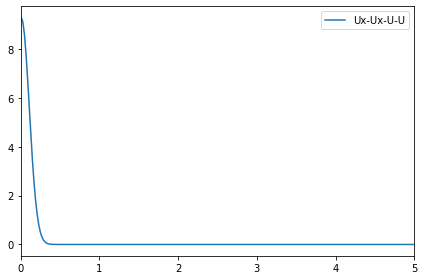

In [43]:
times=np.linspace(1,11,499)
for i1,l1 in enumerate(['Ux']):
    for i2,k1 in enumerate(['Ux']):
        full_corr=np.zeros(2*Neta,dtype=np.float32)
        initial_condition=np.zeros(2*Neta,dtype=np.float32)
        dfl=np.loadtxt("Green-Ux-Ux.dat")/50
        dfk=np.loadtxt("Green-Ux-Ux.dat")/50
        dt=1e-5
        
        Gs_1=np.zeros(2*Neta,dtype=np.float32)
        Gs=np.zeros(2*Neta,dtype=np.float32)
        j=lambda x:(Chi_matrix[-1][-1](x+dt)-Chi_matrix[-1][-1](x-dt))/(2*dt)+1./x*Chi_matrix[-1][-1](x)
        jl=lambda x:Chi_matrix[-1][-1](x)
        jk=lambda x:Chi_matrix[-1][-1](x)
        for m in np.arange(499): 
            for n in np.arange(0,2*Neta):
                Gs[n]+=times[m]*j(times[m])*np.sum(dfl[m]*np.roll(dfk[m],shift=n))*10/499
                
        for n in np.arange(0,2*Neta):
            initial_condition[n]+=times[0]*Chi_matrix[-1][-1](times[0])*np.sum(dfl[0]*np.roll(dfk[0],shift=n))
        full_corr+=(Gs+initial_condition)*50/(NQ_SUM)**2*.197**2
        plt.plot(x123,full_corr,label="{}-{}-{}-{}".format(k1,l1,k2,l2))
        np.savetxt("Ux-Ux.dat".format(k1,l1),full_corr)
        np.savetxt("Uy-Uy.dat".format(k1,l1),full_corr)
        np.savetxt("Ux-Uy.dat".format(k1,l1),Gs_1)
        np.savetxt("Uy-Ux.dat".format(k1,l1),Gs_1)
        plt.legend()
        plt.xlim(0,5)
        plt.tight_layout()
        plt.savefig("Correlations-Ux-Ux.pdf",format='pdf')
        plt.show()
             
                